# 6 Simple Project

Last Updated 20200504MON1800 20190422WEB1530 20180717TUE1700 201801231MON1800 20160207

## 학습내용

### 목표

첫 프로젝트를 구현해 보자.
Solidity로 스마트컨트랙을 만들고, nodejs로 앞 단을 구현한다.


### 목차


* 6.1.1 node 설치
* 6.1.2 Web3 설치
* 6.1.3 ganache-cli
* 문제 6-1: ganache-li 접속
* 6. A Simple Project
* 6.1 절차
* 6.2 Hello World
	* 단계 1: 컨트랙 개발
	* 단계 2: 컴파일
	* 단계 3: 컨트랙 배포
	* 단계 4: 사용
* 6.3 Greeter
* 6.4 계수기
* LAB 타이머
* LAB multiply7

### 문제

* 문제 e-6: [solidity 프로그램을 컴파일하기 (solc)](#e-6)


## 6.1 Web3.js

nodejs를 통해 스마트콘트랙과 인터페이스하기 위해서는 web3.js를 사용해야 한다.
```Web3.js```는 이더리움 노드에 **HTTP, WebSocket 또는 IPC**로 연결해서, 통신하기 위한 **자바스크립트 라이브러리**이다.
분산앱 dApp을 웹으로 구현하려면 스마트콘트랙 API를 자바스크립트 ```Web3.js```에서 호출하면서 그 결과를 화면단에서 받아서 처리하게 된다.

```python
 ------------------                                ------------
 | dApp - web3.js |  --- http, WebSocket, IPC ---  | ethereum |
 ------------------                                ------------
```

nodejs는 자바스크립트의 서버 버전으로, 자바스크립트 문법에 따라 프로그래밍하면 된다.
자바스크립트는 **비동기** 프로그래밍을 지원한다.
블록체인은 그 특성 상 비동기 프로그래밍이 자연스럽다.
거래가 발생한 후 바로 인증이 되는 것이 아니다.
**마이닝을 통해 작업 증명을 해야 하고, 일정 시간 후 거래가 완성**이 되는 방식이다.
따라서 그 시간 동안 프로그램의 실행을 막아놓고 마이닝이 끝나기를 기다리는 동기방식은 바람직하지 않다.
nodejs로 프로그래밍하면서 프로그램하더라도 
예를 들어, 투표 스마트콘트랙에 후보A에 투표를 했다고 하자. 곧 이어 그 투표수를 조회해도 변경이 없을 것이다.
**바로 조회를 하게 될 경우, 마이닝으로 인해 증가된 값을 가지게 되려면 마이닝까지 시간이 걸리기** 때문이다.
마이닝을 해야 완성되므로 비동기 방식이 자연스럽다.


### 6.1.1 node 설치

#### nodejs 설치

리눅스는 ```apt install nodejs```, 맥은 ```brew install nodejs```로 설치하면 된다.
또는 https://nodejs.org 사이트로 가서 자신의 운영체제에 맞는 nodejs를 다운로드한다.
윈도우에 설치하려면 64 또는 32비트 중 자신의 컴퓨터에 맞는 설치파일을 다운로드해서 설치한다.

![alt text](figures/6_nodeDownload.png "node download")

윈도우에서는 내려받읃 msi 파일을 설치한다. 설치 디렉토리는 ```C:\Program Files\nodejs```로 하자.

![alt text](figures/6_nodeInstall.png "node install")

nodejs의 경로를 설정한다. nodejs를 설치한 경로를 등록하여, 명령창에서 실행이 바로 가능하도록 한다. 

![alt text](figures/6_nodePath.png "node path")

#### npm

npm은 노드 패키지 관리자 Node Package Manager이다. npm은 노드 패키지의 저장서 (Repository)이고 이 저장소로부터 설치하거나 관리에 필요한 명령어를 지원한다.
**web3.js를 설치하기 위해서는 npm이 필요**하다.
윈도우에서 **npm은 ```nodejs```와 함께 이미 설치**되어 있다.
명령창에서 ```which npm``` (윈도우에서는 ```where npm```)하면 알 수 있다.
리눅스는 ```apt install npm```으로 설치한다.
npm으로 web3.js를 **프로젝트 디렉토리** ```C:\Users\G312\Code\jsl\20171111```에서 설치한다.

#### npm package 생성

자바스크립트에서는 npm registry에서 패키지를 설치하게 된다.
자신이 패키지를 생성하려면, 디렉토리를 만들고, 그 안에 ```package.json``` 파일을 가지고 있는 파일을 만든다.
```package.json```은 패키지명, 버전, 설명 등 관련 내용을 담고 있다.

새로운 패키지를 생성하려면 다음 명령으로 package.json을 생성한다. 처음 생성할 때는 name, version, author 등의 정보를 입력하게끔 되어 있고, 그러면 package.json을 생성하게 된다.
```python
> npm init
```


#### npm 명령어

설치는 전역으로 설치하거나 특정 사용자 권한으로 설치할 수 있다. 전역으로 설치할 때는 ```-g``` 스위치를 넣어주고, 이를 생략하면 사용자 권한으로 설치하게 된다.

필요한 라이브러리를 설치하는 명령어는 ```install```이고, 설치 디렉토리 아래 ```node_modules```이 생성된다.
```python
npm install
```

라이브러리가 설치 되었는지 확인하기 위해서는:
```python
npm list
```

전역으로 설치한 패키지 ```{prefix}/lib/node_modules/<package>```에 대한 symlink를 현재 디렉토리에 만든다.
prefix는 ```npm config list```에 적혀있다.

```python
npm link
```

![alt text](figures/6_nodeweb3After_npm_link_web3.png "nodel run web3 after npm link web3")

### 6.1.2 Web3 설치

```python
npm install web3
```

버전 1.0 이전에는 0.20.x버전으로 머물렀다.
버전 1.0은 오랫동안 beta로 50회 넘게 버전 업이 되었다가,
2019년 중반 1.2.0이 발표되었다.

```npm view``` 명령어로 버전 정보를 알아보자.
```--json``` 스위치를 붙이면 전체 목록을 출력하게 된다.

In [2]:
!npm view web3 versions --json

 
[
  "0.2.5",
  "0.2.6",
  "0.2.7",
  "0.2.8",
  "0.3.0",
  "0.3.1",
  "0.3.2",
  "0.3.3",
  "0.3.4",
  "0.3.6",
  "0.4.0",
  "0.4.1",
  "0.4.2",
  "0.4.3",
  "0.5.0",
  "0.6.0",
  "0.7.0",
  "0.7.1",
  "0.8.0",
  "0.8.1",
  "0.9.0",
  "0.9.1",
  "0.9.2",
  "0.10.0",
  "0.11.0",
  "0.12.0",
  "0.12.1",
  "0.12.2",
  "0.13.0",
  "0.14.0",
  "0.14.1",
  "0.15.0",
  "0.15.1",
  "0.15.2",
  "0.15.3",
  "0.16.0",
  "0.17.0-alpha",
  "0.17.0-beta",
  "0.18.0",
  "0.18.1",
  "0.18.2",
  "0.18.4",
  "0.19.0",
  "0.19.1",
  "0.20.0",
  "0.20.1",
  "0.20.2",
  "0.20.3",
  "0.20.4",
  "0.20.5",
  "0.20.6",
  "0.20.7",
  "1.0.0-beta.1",
  "1.0.0-beta.2",
  "1.0.0-beta.3",
  "1.0.0-beta.4",
  "1.0.0-beta.5",
  "1.0.0-beta.6",
  "1.0.0-beta.7",
  "1.0.0-beta.9",
  "1.0.0-beta.10",
  "1.0.0-beta.11",
  "1.0.0-beta.12",
  "1.0.0-beta.13",
  "1.0.0-beta.14",
  "1.0.0-beta.15",
  "1.0.0-beta.16",
  "1.0.0-beta.17",
  "1.0.0-beta.18",
  "1.0.0-beta.19",
  "1.0.0-beta.20",
  "1.0.0-beta.21",
  "1.0.0-bet

#### npm web3.js 설치

nodejs 단말을 열어서 실행한다.
```npm install 패키지명```으로 설치를 하게 돤다. ```package.json```에 기록된 패키지의 의존성이 갱신되어야 하는데 ```--save``` 옵션으로 해준다. ```--save```는 생략해도 기본 옵션으로 처리된다.

```python
npm install web3.js
```

![alt text](figures/1_npmInstallWeb3AfterWindow-build-tools.png "nodel install Window-build-tools")

> **nodejs 설치할 때 gyp 오류**

> ```npm install web3```하면 최신 버전을 설치한다.
web3.js 1.0 버전을 설치하면서 gyp 오류가 나는 경우 ```windows-build-tools```를 설치해야 한다.
gyp는 nodejs로 만든 모듈을 컴파일하는 명령어 도구이다.
```python
npm install --global --production windows-build-tools (관리자 권한으로)
npm install web3@^1.0.0-beta.36
npm install -g node-gyp
node-gyp configure --msvs_version=2015
```

> 설치하면서 사용하게 되는 python 버전을 설정하기 위해서는 다음과 같이 한다.
npm은 이 python 버전 정보를 node-gyp를 실행할 떄 넘겨준다.
```python
npm install --python=python2.7
또는
npm config set python /path/to/executable/python2.7
```
nodejs 단말을 열어서 실행한다.

![alt text](figures/1_npmInstallWindow-build-tools.png "nodel install Window-build-tools")

```npm list```하면 ```web3.js``` 설치된 라이브러리를 확인할 수 있다.

> npm **ERR! extraneous**

> 패키지가 설치되었지만 package.json에 등록이 되지 않았다는 의미이다. 따라서 무시하고 문제없이 사용하면 된다.


In [4]:
!npm list --depth 1

bitcoin@1.0.0 /home/jsl/Code/git/bb/jsl/bitcoin
├── @openzeppelin/contracts@2.5.0 extraneous
└── web3@1.2.5-rc.0 extraneous

npm ERR! extraneous: @openzeppelin/contracts@2.5.0 /home/jsl/Code/git/bb/jsl/bitcoin/node_modules/@openzeppelin/contracts
npm ERR! extraneous: web3@1.2.5-rc.0 /home/jsl/Code/git/bb/jsl/bitcoin/node_modules/web3


#### web3.js 버전 선택하여 설치하기


아직 버전 1.0이 안정화되지 않았으므로, 관리자 권한으로 이미 설치되었던 1.0을 제거하고, 하위 버전으로 설치하려면 ```npm install <package>@<version>```으로 한다.

다음과 같이 ```@0.20``` 버전을 명시하고, 해당 버전의 최신버전으로 설치하자.
```python
npm install -g web3@0.20
```

설치하고 버전을 확인하려면
```python
npm view web3 versions
```

![alt text](figures/6_installWeb3_0.2AfterUninstall_1.0beta.png "node web3 test run")

#### web3.js 테스트 실행

네트워크에 연결하려면 geth가 실행되고 있어야 한다.
여기서는 버전만 확인해 본다.
대소문자 web3, Web3에 주의한다.
```python
> var Web3=require('web3');
> Web3.version
```
그리고 Web3.modules.<TAB>을 누르면, 출력되는 
4개의 모듈 Eth, Personal, Net, Shh을 확인해 보자.

![alt text](figures/6_nodeWeb3TestRun.png "node web3 test run")

### 6.1.3 ganache-cli

TestRPC인 ganache-cli를 설치한다.

```python
프로젝트 디렉토리\npm install ganche-cli
```

포트는 8345로 설정한다 (기본 8545는 geth에서 사용하므로 다른 포트를 사용한다)

```python
jsl@jsl-smu:~/Code/git/bb/jsl/bitcoin$ ganache-cli -p 8345
Ganache CLI v6.3.0 (ganache-core: 2.4.0)

Available Accounts
==================
(0) 0xdc3f9fd9b1205bb854e5a8bb287816bf3e9fbdf6 (~100 ETH)
(1) 0x6d814bcd9060d1998c6d43fe01f919c16e0cf667 (~100 ETH)
(2) 0x6ee93ca4837d1ab240a572b9b0003e28c91985f0 (~100 ETH)
(3) 0xec4c1cdc59be9c1255126af2bef68db15901d7fb (~100 ETH)
(4) 0x52d6ab35013028e7e27b3a885395eceab31e9379 (~100 ETH)
(5) 0x600aa8cab64a4cdd2311179df664eba32f3133b5 (~100 ETH)
(6) 0x413d6070ff97092fa34daa2aa5625bea25f9864b (~100 ETH)
(7) 0x4bdc6ea64d2d54b881c0524ccd13080983f8f967 (~100 ETH)
(8) 0xe19dcbd534ef302ee8b9c1a6306c42306c93c82f (~100 ETH)
(9) 0xfc4aa1584398e0eb77a8a4154fed71761ba5534e (~100 ETH)

Listening on 127.0.0.1:8345
eth_accounts 아래 web3.eth.accounts 명령어에 반응
```

![alt text](figures/6_gangacheInstallRun.png "ganache-cli install and run")

앞서 사설망 연결했던 것을 기억해서, geth attach http://localhost:8345 로 접속한다 (또는 http://127.0.0.1:8345)

![alt text](figures/6_gangacheAttachConsole.png "gangache-cli console on 8345")

nodejs에서 ganache에 연결하려면
ganache를 실행하고, node에서 HttpProvider()로 연결한다.


```python
jsl@jsl-smu:~/Code/git/bb/jsl/bitcoin$ node
> var Web3=require('web3')
undefined
> var web3=new Web3(new Web3.providers.HttpProvider("http://localhost:8345"));
undefined
> web3.eth.accounts
[ '0xdc3f9fd9b1205bb854e5a8bb287816bf3e9fbdf6',
  '0x6d814bcd9060d1998c6d43fe01f919c16e0cf667',
  '0x6ee93ca4837d1ab240a572b9b0003e28c91985f0',
  '0xec4c1cdc59be9c1255126af2bef68db15901d7fb',
  '0x52d6ab35013028e7e27b3a885395eceab31e9379',
  '0x600aa8cab64a4cdd2311179df664eba32f3133b5',
  '0x413d6070ff97092fa34daa2aa5625bea25f9864b',
  '0x4bdc6ea64d2d54b881c0524ccd13080983f8f967',
  '0xe19dcbd534ef302ee8b9c1a6306c42306c93c82f',
  '0xfc4aa1584398e0eb77a8a4154fed71761ba5534e' ]
> 
```

nodejs 단말을 열어서 실행한다.
nodejs solc 컴파일러를 설치한다.

![alt text](figures/6_nodejsInstallsolc.png "node install solc compiler")

## 문제 6-1: ganache-cli 네트워크에 클라이언트 접속
<a id='3-4'></a>

### ganache-cli

앞서 geth 사설망을 개설한 바 있다.
거의 유사한 방식으로 하겠지만, geth 대신 ganache를 실행하기로 한다.
ganache를 설정하고 실행하는 차이는 거의 없다.
ganache는 마이닝을 할 필요가 없어서 편리하다.
다음과 같이 IP 주소를 적고, 포트를 8345로 해서 접속한다.


In [4]:
%%writefile _ganacheNow.bat
node_modules\.bin\ganache-cli --unlock 0 --host "127.0.0.1" --port "8345"


Writing _ganacheNow.bat


In [ ]:
# %load _ganacheNow.sh
ganache-cli --unlock 0 --host "117.16.44.45" --port "8345"


### geth attach

그리고 명령창을 하나 더 열어 설정한다.
```python
geth attach http://127.0.0.1:8345
```

### node

명령창을 하나 더 열어 node를 시작한다.
앞서 web3.js를 설치한 **프로젝트 디렉토리에서 node를 실행**한다.

```python
$ Code\jsl\201711111> node
> var Web3=require('web3')
undefined
```

## 6.3 블록체인에 연결

### Web3 Providers

node에서 'web3'라이브러리를 호출한다.
그리고 Web3에서 HTTP, WebSocket 또는 IPC로 이더리움 노드에 연결할 수 있다.
b
```python
> var Web3=require('web3');
> var web3=new Web3('http://localhost:8445');   //replace 'localhost' with an ip address
또는
> var web3=new Web3(new Web3.providers.HttpProvider('http://localhost:8445'));
```

Web3 providers를 설정하고 나면 ```web3.currentProvider```를 사용할 수 있게 된다.
Mist 또는 MetaMask를 사용할 경우 해당하는 ```web3.currentProvider```가 설정된다.

```python
if (!web3.currentProvider) {
    web3.setProvider('http://localhost:8445');
}
```

### eth 모듈

앞서 geth에서 배웠던 eth 모듈의 함수를 실행하여 결과를 볼 수 있다. 함수명은 version 1.0부터 ```get```이 붙게 되었지만 대동소이하지만
javascript의 이벤트 처리 방식의 문법을 따르고 있다.
Web3 1.0는 함수의 callback에 Promises를 지원하고 있다. ```then(console.log)```과 같이 결과를 출력한다.

nodejs를 실행하기 때문에 파일에 저장하고 실행해 보자.
IP는 자신의 설정에 맞게 변경해 주어야 한다.

In [5]:
%%writefile src/web3ethCommands.js
var Web3 = require('web3');
var web3 = new Web3('http://117.16.44.45:8345');
web3.eth.getCoinbase().then(console.log);
//web3.eth.getChainId().then(console.log);
web3.eth.getAccounts(console.log);
web3.eth.getCoinbase().then(console.log);
web3.eth.getBlockNumber().then(console.log);
web3.eth.getBalance('0xf2a4f09c903a0a7b3450d9d16bbca14dea36aee1').then(console.log);
web3.eth.getNodeInfo().then(console.log);

Overwriting src/web3ethCommands.js


In [6]:
!node src/web3ethCommands.js

0x14659250a4c2065adf48ed4b81e53faa4f4eb112
null [ '0x14659250A4c2065aDF48Ed4b81e53faA4f4eb112',
  '0xE3C8554e2D6e3C7979991e2CE9512B8cb9dF8BF3',
  '0x08A9345F7104c45D8E8BC83171cB61c6C88Dd8d9',
  '0x5b329eB20e43c684DE4B5722bD884E279487FF7c',
  '0x91325bb0AbB7c9E6A676e1710FeE8693DA436681',
  '0xf1Fbe177D35D89FdF5f66Ad44b55509CDCB11db9',
  '0xeEE301d549a616513b643aD9dF178db4133a4883',
  '0x1DF9f6A98C632F170A21a7b80ba57eE21eBbfd58',
  '0xa37F07938671440Afce637579eC86B7c01F31952',
  '0x800577a6a13D3B7dc782EefFb3Ad1f3cd7EdcB16' ]
0x14659250a4c2065adf48ed4b81e53faa4f4eb112
0
0
EthereumJS TestRPC/v2.4.0/ethereum-js


#### account 조회

버전 1.0 이후 주소는 ```eth.accounts[0]``` 이런 식으로 배열 인덱스로 읽어올 수 없게 되었다.
비동기로 가져오게 변경되었는데, 배열을 이용하면 동기화 문제로 출력이 되지 않는다.
```python
var my=web3.eth.getAccounts().then(it => { console.log(it[0]); });
```

accounts는 거래가 발생할 때마다 필요한 정보이므로, 하드코딩하기 보다는 변수에 저장해 놓고 사용하면 편리하다.
전역변수로 사용하려면 문제가 발생한다.

In [18]:
%%writefile src/web3accounts.js
var Web3 = require('web3');
var web3 = new Web3('http://117.16.44.45:8345');
web3.eth.getAccounts(function(err,res) { console.log("accounts: " + res); } );
my=[]
web3.eth.getAccounts(function(err, res) { for (x in res) { my.push(res[x]) } } );
console.log("accounts from array: " + my[0]);

Overwriting src/web3accounts.js


In [19]:
!node src/web3accounts.js

accounts from array: undefined
accounts: 0x74B95B2b31Fab5bF3A68004691F5F05c3C70D3a0,0x35545a97d667f62817Ff599c5C4b32D181485DCE,0x4a89991a5b0C13febe481327CF1414cE90a1e613,0x18F021EAB0597879cBe9Fcb4033Ebb54D716D7f7,0x727E47188d78682Ca839E1020E4071E41B184F1d,0x17C7F62B04eF59501A0339b08cF470244bE1042E,0xa6524eDa8F6063eeC46aA8F8A74DE72CbB839624,0x95C0EE2b2Ab4f75ebb649AA28F86f890AD9aa125,0x168732606683524B9aa1caB3D5773587285CDb6e,0x486b3A2023301A2AD9f67Fcc063499aD7620A869


계정정보는 함수내에서 구해서 사용하면 된다.
우선은 하드코딩해서 사용하고, 나중에 다음과 같이 함수내에서 계정정보를 받아와서 프로그래밍하자.

In [20]:
%%writefile src/web3account0.js
var Web3 = require('web3');
var web3 = new Web3('http://117.16.44.45:8345');
var account0;
async function getAccount0() {
    accounts = await web3.eth.getAccounts();
    account0=accounts[0];
    console.log("local account0: " + account0);
}
getAccount0()
console.log("global account0: " + account0);

Overwriting src/web3account0.js


In [21]:
!node src/web3account0.js

global account0: undefined
local account0: 0x14659250A4c2065aDF48Ed4b81e53faA4f4eb112


#### personal 모듈

personal 모듈은 eth를 통해 제공된다.
계정관련 ```web3.eth.personal.lockAccount```, ```web3.eth.personal.unlockAccount```
거래관련 ```web3.eth.personal.sendTransaction```, ```web3.eth.personal.signTransaction``` 등의 함수가 제공된다.


### utils

```randomHex()```는 32바이트 무작위 hex를 생성한다. 64자리 문자열이 출력된다.
```keccak256()```는 입력의 keccak256을 계산한다.
```isAddress()```는 입력이 이더리움 주소인지 확인한다.
```utf8ToHex()```는 utf8 문자열을 hex로 변환한다.
```toWei()``` Wei로 변환한다.

```console.log()```로 출력한다.

In [9]:
%%writefile src/web3utils.js
var Web3 = require('web3');
var web3 = new Web3('http://117.16.44.45:8345');
console.log(web3.utils.randomHex(32));    //generate random 32 byte hex
console.log(web3.utils.keccak256('234'));  //calculate keccak256 for '234'
console.log(web3.utils.isAddress('0xf2a4f09c903a0a7b3450d9d16bbca14dea36aee1'));  //check if the input is a valid address
console.log(web3.utils.utf8ToHex('안녕'));
console.log(web3.utils.toWei('1', 'ether'));

Overwriting src/web3utils.js


In [10]:
!node src/web3utils.js

0xa41aba4831fd5763b855f74b93c31ea05af74259e83fcbea1a1441d22bd84d47
0xc1912fee45d61c87cc5ea59dae311904cd86b84fee17cc96966216f811ce6a79
true
0xec9588eb8595
1000000000000000000


## 6.4 컨트랙

프로그래밍을 배우면서 보통 "Hello World"를 만들게 된다.
간단한 프로그램이지만 코딩, 컴파일, 실행, 테스트를 해보면서 그 언어의 특징을 이해하게 된다.

PlantUML을 사용해서 절차도를 그려보자 (https://github.com/jbn/IPlantUML).

블록체인 애플리케이션은 컨트랙을 개발해서 블록체인에 배포한후 API를 사용한다.

단계 | 구분 | 설명
-----|-----|-----
1 | 개발 | 컨트랙 **소스 코드** 개발
2 | 컴파일 | 소스코드를 컴파일해서 **ABI**, **Byte code** 생성
3 | 컨트랙 배포 | 컴파일해서 얻은 ABI, Byte code로 객체를 생성한 후 배포 요청, 마이닝해서 블록체인의 주소 **contract address** 획득
4 | 사용 | **ABI**, **contract address**로 컨트랙 객체를 생성해서, ```call()``` 또는 ```sendTransaction()``` 함수로 API 호출.

표에서 등장한 ABI는 Application Binary Interface로 컨트랙을 사용하기 위해 인터페이스 표준으로, JSON으로 표현된다. 또한 Byte code는 Solidity 소스코드를 컴파일한 기계어인 바이트코드이다.

In [10]:
import iplantuml

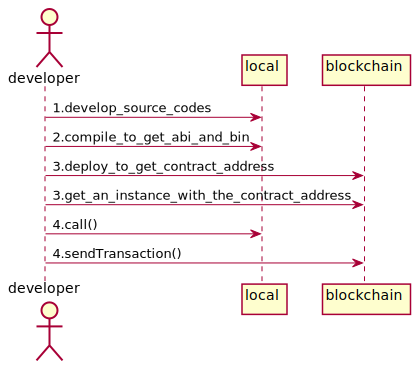

In [14]:
%%plantuml --jar
@startuml
actor developer
developer -> local: 1.develop_source_codes
developer -> local: 2.compile_to_get_abi_and_bin
developer -> blockchain: 3.deploy_to_get_contract_address
developer -> blockchain: 3.get_an_instance_with_the_contract_address
developer -> local: 4.call()
developer -> blockchain: 4.sendTransaction()
@enduml

### 단계 1: 컨트랙 개발

컨트랙은 REMIX에서 개발해보자.
**REMIX**는 온라인 http://remix.ethereum.org/ 에서 제공되는 Solidity 통합개발환경 (IDE, Integrated Development Environment)을 말한다. http WebProvider를 사용하기 위해서 https 보다는 http연결을 하자. 
REMIX는 보통 개발환경에서 제공하는 컴파일, 디버깅, 편집, 배포, 테스트 등의 기능을 제공한다.
온라인에서 사용하는 것이 불편하다면, https://github.com/ethereum/remix-live/tree/gh-pages로 가서 zip파일을 내려받아 자신의 컴퓨터에 설치하여 사용할 수 있다.

또한 github과 연동하여 사용할 수 있다. ```&gist=여기에 id```를 URL에 넣어서 전송하여, gist로 소스코드를 내보내거나 읽을 수 있다. 

![alt text](figures/sol_helloWeb3Remix.png "geth download page")

Solidity가 처음이라 명령어가 낯설겠지만, 객체지향언어이므로 클래스를 코딩하는 것과 같이 시작을 한다.
지금은 한 사이클을 완성하기 위해서 하는 코딩이다. 명령어는 차츰 배워나가게 된다.
REMIX에서 테스트해보고 요구사항대로 작동하면 코드를 복사해서 저장한다.

줄 | 설명
-----|-----
1 | 메이저 버전 0.6이상 가운데, 최신 버전으로 컴파일. 앞의 햇 ```^```표시가 그런 의미이다.
2 | 컨트랙 명칭을 Hello로 정함
3 | ```sayHello()``` 함수, string으로 지역변수 값을 반환하는 단순 조회
4 | 문자열 ```Hello World``` 반환

> **버전의 문제**

> ```Hello```를 Geth에서 Deploy는 성공하였지만, API를 사용하는 단계에서 반환 값의 오류가 나는 경우가 있다.
예를 들어, 이런 오류를 경험하였다 **ERROR Returned values aren't valid. did it run Ouf of Gas?**
이 경우 **Solidity 버전을 낮추어** 컴파일 한 후 (0.4.25, 0.5.0, 0.5.1, 0.5.3 모두 성공, 0.5 후반대와 0.6은 모두 오류), ABI와 Bytecode로 새로 배포해서 API를 호출해보자.
또는 getPastEvents() 함수를 사용하는 경우 web3 1.0.0 beta에서는 **ERROR Returned values aren't valid. did it run Ouf of Gas?** 오류가 나지만, **web3 버전을 낮추어** 0.20.7에서는 그렇지 않다는 이슈가 있기도 하다.
나중에 배우겠지만 **Library**를 배포하고, API를 사용하면서 Solidity 0.5.x에서는 올바르게 작동하지 않았다. 버전을 낮추어 0.4.25로 하니까 오류가 사라졌다. Solidity 언어가 버전 간의 **후방호환성 backward compatibility**가 보장이 되지 않아서 문제가 되고 있다고 판단된다.

In [43]:
%%writefile src/Hello.sol
pragma solidity ^0.6.0;
contract Hello {
    function sayHello() pure public returns(string memory) {
        return "Hello World";
    }
}

Overwriting src/Hello.sol


### 단계 2: 컴파일

소스코드를 컴파일하기 위해서는 (1) REMIX를 사용하거나, (2) solc compiler를 사용하면 된다.

#### REMIX 컴파일

REMIX에서 버전 0.6.0으로 컴파일 해보자.
* ```Hello.sol```을 코딩한 후,
* ```compile``` 버튼을 누른다.
* ```Compilation Details``` 버튼을 누르면, ABI와 bytecode가 생성되어 있다.
또는 ```WEB3DEPLOY```에 ABI, bytecode가 포함된 코드를 발견할 수 있다.
주의할 점은 ```WEB3DEPLOY```가 우리가 사용하는 **web3.js 버전을 지원**하는지 이다.

```python
var helloContract = web3.eth.contract([{"inputs":[],"name":"sayHello","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"pure","type":"function"}]);
var hello = helloContract.new(
   {
     from: web3.eth.accounts[0], 
     data: '0x608060405234801561001057600080fd5b5061011e806100206000396000f3fe6080604052348015600f57600080fd5b506004361060285760003560e01c8063ef5fb05b14602d575b600080fd5b603360ab565b6040518080602001828103825283818151815260200191508051906020019080838360005b8381101560715780820151818401526020810190506058565b50505050905090810190601f168015609d5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b60606040518060400160405280600b81526020017f48656c6c6f20576f726c6400000000000000000000000000000000000000000081525090509056fea2646970667358221220b6877a972a9ca7f396c5cb7c0a7ae50d7532a82ded3789e90afa4b3e108a631364736f6c63430006010033', 
     gas: '4700000'
   }, function (e, contract){
    console.log(e, contract);
    if (typeof contract.address !== 'undefined') {
         console.log('Contract mined! address: ' + contract.address + ' transactionHash: ' + contract.transactionHash);
    }
 })
```

#### solc compile

설치해 놓은 solc commpiler를 실행하여 ABI, bytecode를 생성할 수 있다.
sayHello()의 gas가 ```infinite```라고 하는 것은 반드시 무한대로 필요하다는 의미는 아니다.
(```solc --asm src/Hello.sol```로 컴파일을 하면 backward jump 문이 포함되어 있는 경우 무한대로 계산)

In [35]:
!solc --version

solc, the solidity compiler commandline interface
Version: 0.6.1+commit.e6f7d5a4.Linux.g++



ABI는 컨트랙과 인터페이스하기 위한 표준으로 JSON으로 출력된다. 아래의 abi를 보자. 
```sayHello()``` 함수의 입력 ```inputs```, 출력 ```outputs```를 정의하고 ```stateMutability```가 ```pure```, ```view```, ```non-payable```, ```payable``` 인지 정의하고 있다.
이전에는 ```constant```, ```payable```이 사용되었지만 지금은 제거되어 ```stateMutability```로 대체된다.


In [44]:
!solc --abi --bin --gas src/Hello.sol


======= src/Hello.sol:Hello =======
Gas estimation:
construction:
   105 + 57200 = 57305
external:
   sayHello():	infinite
Binary:
608060405234801561001057600080fd5b5061011e806100206000396000f3fe6080604052348015600f57600080fd5b506004361060285760003560e01c8063ef5fb05b14602d575b600080fd5b603360ab565b6040518080602001828103825283818151815260200191508051906020019080838360005b8381101560715780820151818401526020810190506058565b50505050905090810190601f168015609d5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b60606040518060400160405280600b81526020017f48656c6c6f20576f726c6400000000000000000000000000000000000000000081525090509056fea26469706673582212208ff7c230fefd3d4a66a11d93dd077f556120f8054ee595e3f77349648b8460e064736f6c63430006010033
Contract JSON ABI
[{"inputs":[],"name":"sayHello","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"pure","type":"function"}]


#### 언어에 내장된 solc

geth 1.6부터는 eth_compilers, eth_compileSolidity 지원이 중단되었다.

In [36]:
myrpc="http://117.16.44.45:8445"

In [37]:
%%bash -s "$myrpc"
geth --exec "eth.getCompilers()" attach $1

Error: the method eth_getCompilers does not exist/is not available
    at web3.js:3143:20
    at web3.js:6347:15
    at web3.js:5081:36
    at <anonymous>:1:1



다른 언어에서 내장형으로 컴파일 할 수 있다. node solc, py-solc 등이 제공되고 있다. 한 줄씩 실행하는 Solidity REPL 기능도 설치하여 사용할 수 있다.
```python
npm install solidity-repl
```

### 단계 3: 배포

컨트랙 배포는:
* 컴파일해서 얻은 ABI, Byte Code를 사용해서 contract 객체를 생성하고
* 배포를 요청하고 (```transactionHash```를 얻음)
* 마이닝을 하고 나면 ```blockchain```에서의 주소 ```contractAddress```를 받게 된다.


#### contract 생성

```new()``` 명령어로 객체를 생성하다. 이 때 ABI가 필수적으로 필요하고, address, options은 꼭 그렇지 않다.

```python
new web3.eth.Contract(abi [, address] [, options])
```
* abi는 컨트랙에 대한 json 인터페이스
* address는 블록체인 주소를 말하며, 최초 배포할 때는 당연히 없으므로 비워놓는다. 배포한 컨트랙을 사용할 경우 해당 주소를 적어주면 된다.
* options는 from, gasPrice, gas, data (컨트랙의 바이트코드)


코드로 표현해보자. ABI, 바이트코드를 추가해서 컨트랙을 생성하고 있다.
```python
> var myGreeter = new web3.eth.Contract(_abi, {data: '0x'+_bin});
undefined
```

#### 배포요청

컨트랙을 배포하려면 ```deploy()``` 함수를 사용하면 해당 컨트랙을 블록체인에 배포하게 된다.
```python
myGreeter.deploy(options)
```

options에 설정할 수 있는 입력은 data와 arguments를 포함한다.
* data는 컨트랙의 바이트코드
* arguments 컨트랙 생성자의 인자, 없으면 생략한다.

컨트랙을 배포할 경우, 물론 블록체인에 전송해야 한다.
```deploy()``` 함수에 연결 chaining하여 ```send()``` 함수를 적어준다.

```python
send(options [, callback])
```
* options에는 ```from```, ```gasPrice```, ```gas```, ```value```
* callback함수는 이벤트 ('transactionHash' 등)에 따라 callback된다. 첫 인자는 'error'를 넣어주어야 한다. callback 함수는 **PromiEvent를 반환**한다. ```PromiEvent```에 ```on```, ```once```, ```off``` 함수를 연결하여 이벤트를 처리할 수 있다.

#### PromiEvents

web3.js에서의 callback함수는 promise를 반환하여, 다음 연결함수 ```on```, ```once```, ```off```를 연결하여 (chaining) 이벤트 event를 발생할 수 있다. 사용할 수 있는 PromiEvent는:
* ```transactionHash```: 거래가 전송된 직후 transction hash가 발생하는 이벤트 발생
* ```receipt```: transactionReceipt이 만들어지는 이벤트 발생
* ```confirmation``` 매 24번째 confirmation 마다 이벤트 발생
* ```error```: 오류에 대해 이벤트 발생

```python
.once('myEvent', {
}, function(error, event){ console.log(event); });
```

> 자바스크립트 promise

> 비동기 함수를 처리하는 패턴으로,
> **결과 값을 지금이 아니고, 약속을 하여 처리에 필요한 시간이 경과한 후 반환**하게 된다.
> 약속은 아직 완료되지 않은 실행을 의미하며, ```fulfilled```, ```rejected```, ```pending``` 또는 ```settled (fulfilled 혹은 rejected)```이 될 수 있다.

#### promise/then
```promise```는 결과 값이 지연되는 경우이고, ```then()``` 함수로 성공인 경우, 실패인 경우로 그 결과 값을 출력할 수 있다.
* ```doPromise```은 ```promise```의 인자는 성공에 해당하는 ```myResolve``` 또는 실패에 해당하는 ```myReject```를 가진다. 성공인 경우에 실행되는 ```myResolve()```에 인자로 ```100```를 받아 결과 값으로 만든다.
* 이 값은 ```doPromise```의 연결 함수 ```then()``` 함수의 인자 ```my```로 넘겨가게 된다. ```err```인 경우에 callback으로 처리할 수 있다.

In [4]:
%%writefile src/promiseThen.js
var doPromise = new Promise(function(myResolve, myReject) {
    myResolve(123);  //value to return
    //myReject("Rejected!!!");
});

doPromise.then(function(my){
        console.log("RETURNED: "+my);
    }, function(err) {
        console.log("ERROR: "+err);
    });

Overwriting src/promiseThen.js


In [5]:
!node src/promiseThen.js

RETURNED: 123


promise를 1로 결과 값을 만들고 1초 후에 then() 함수로 보낸다. 연이어 10을 곱해서 다음 then()으로 보낸다.

In [9]:
%%writefile src/promiseThen1.js
new Promise(function(resolve, reject) {
    resolve(3)
}).then(function(res) {
    console.log("3 is expected..."+res); //3
    return res * 10;
}).then(function(res) {
    console.log("30 is expected..."+res); //30 as multiplied by 10 on 2 lines above
    return res * 10;
}).then(function(res) {
    console.log("300 is expected..."+res); //300
});

Overwriting src/promiseThen1.js


In [10]:
!node src/promiseThen1.js

3 is expected...3
30 is expected...30
300 is expected...300


#### async/await

Async 함수는 promise를 반환한다. 비동기함수이므로 바로 값을 반환하지 않는 것이다. promise가 성공적으로 완료되면 결과 값이 반환되고, 그렇지 못하는 경우에는 예외를 발생하거나 오류가 발생하여 반환된다.

**await**는 **async 함수의 실행을 promise가 완결할 때까지 (fulfilled 또는 rejected) 중지**하고, promoise가 완료되는 경우 그 실행을 재개하고 그 결과 값을 받게된다 (성공인 경우 결과 값, rejected이면 거절된 값). **await 함수는 async 함수에서만** 쓰이고, 전역으로는 쓰일 수 없다.
async/await를 사용하면, await가 결과가 나올 때까지 대기상태로 있기 때문에 **```.then```을 사용하지 않아도 된다**.
또한 **try..catch문**을 (```.catch``` 구문을 사용하기 보다는) 쓰면 편리하다.

In [11]:
%%writefile src/asyncAwait.js
async function hello() {
    await 1000;
    return "hello";
}
hello().then(console.log);

Overwriting src/asyncAwait.js


In [12]:
!node src/asyncAwait.js

hello


#### 마이닝

배포를 완성하려면 그 거래가 마이닝되어야 한다.
```python
> miner.start(1);admin.sleepBlocks(1);miner.stop
```

마이닝이 되고 나면 비로서 콘트랙이 블록체인에 배포된다.
따라서 ```blockNumber```가 증가하게 된다.
그리고 콘트랙이 배포된 블록체인의 주소 값이 생성된다. 아래 ```getTransactioinReceipt(해시주소)```를 조회해보면 마이닝이 완료되기 전에는 null이다.

```python
> eth.getTransactionReceipt("0x3c58a...50bd5")
> eth.getTransactionReceipt("0x3c58a...50bd5").contractAddress
> eth.getCode(greeter.address) 배포 주소로 deployed code를 확인
```

#### REMIX에서 자동생성된 배포 파일은 web3 0.20

REMIX에서 복사해서 HttpProvider만 생성하도록 수정한 아래 ```HelloDeploy__.js```는 web3.js 1.0이상 버전에서는 실행되지 않는다 (앞으로 web3.js 0.20.x에서 실행하는 파일명 뒤에는 underscore를 붙임).
실행하기 전, geth를 띄워놓아야 한다. 포트번호만 다르게 해서 ganache-cli도 띄워 놓자.

In [2]:
%%writefile src/HelloDeploy__.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8345"));
var helloContract = web3.eth.contract([{"inputs":[],"name":"sayHello","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"pure","type":"function"}]);
var hello = helloContract.new(
   {
     from: web3.eth.accounts[0], 
     data: '0x608060405234801561001057600080fd5b5061011e806100206000396000f3fe6080604052348015600f57600080fd5b506004361060285760003560e01c8063ef5fb05b14602d575b600080fd5b603360ab565b6040518080602001828103825283818151815260200191508051906020019080838360005b8381101560715780820151818401526020810190506058565b50505050905090810190601f168015609d5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b60606040518060400160405280600b81526020017f48656c6c6f20576f726c6400000000000000000000000000000000000000000081525090509056fea2646970667358221220b6877a972a9ca7f396c5cb7c0a7ae50d7532a82ded3789e90afa4b3e108a631364736f6c63430006010033', 
     gas: '4700000'
   }, function (e, contract){
    console.log(e, contract);
    if (typeof contract.address !== 'undefined') {
         console.log('Contract mined! address: ' + contract.address + ' transactionHash: ' + contract.transactionHash);
    }
 })

Overwriting src/HelloDeploy__.js


위 프로그램은 web3.js@0.20.x 버전으로 명령어가 변경되었다. 컨트랙을 생성할 경우 ```new``` 명령어를 사용한다.

In [3]:
!node src/HelloDeploy__.js

/home/jsl/Code/git/bb/jsl/bitcoin/src/HelloDeploy__.js:3
var helloContract = web3.eth.contract([{"inputs":[],"name":"sayHello","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"pure","type":"function"}]);
                             ^

TypeError: web3.eth.contract is not a function
    at Object.<anonymous> (/home/jsl/Code/git/bb/jsl/bitcoin/src/HelloDeploy__.js:3:30)
    at Module._compile (module.js:652:30)
    at Object.Module._extensions..js (module.js:663:10)
    at Module.load (module.js:565:32)
    at tryModuleLoad (module.js:505:12)
    at Function.Module._load (module.js:497:3)
    at Function.Module.runMain (module.js:693:10)
    at startup (bootstrap_node.js:188:16)
    at bootstrap_node.js:609:3


web3.js 최신버전에서 실행이 되도록 수정해 주자.
우선, Gas 값을 계산해보자. 이를 위해서는 data를 입력해 주면 그 바이트 크기와 Opcode에 따라 계산된다.

gas를 산정하기 위해서는 ```estimateGas()```로 한다.
```python
myGreeter.deploy().estimateGas()
    .then((estimatedGas) => {
        console.log("Estimated gas: " + estimatedGas);
        gas = estimatedGas;
    })
```

gasPrice()를 계산하기 위해서는
```python
> web3.eth.getGasPrice().then(console.log);
> 1000000000
```

In [45]:
%%writefile src/HelloDeployGas.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8345"));
var shelloContract = new web3.eth.Contract([{"inputs":[],"name":"sayHello","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"pure","type":"function"}]);
shelloContract
    .deploy({
            data: '0x608060405234801561001057600080fd5b50610139806100206000396000f3fe608060405234801561001057600080fd5b5060043610610048576000357c010000000000000000000000000000000000000000000000000000000090048063ef5fb05b1461004d575b600080fd5b6100556100d0565b6040518080602001828103825283818151815260200191508051906020019080838360005b8381101561009557808201518184015260208101905061007a565b50505050905090810190601f1680156100c25780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b60606040805190810160405280600b81526020017f48656c6c6f20576f726c6400000000000000000000000000000000000000000081525090509056fea165627a7a72305820992c2f4c73a27b9eb53c6aa7b52ba8a5eddba258089eb7d1a3710711703459950029', 
    })
    .estimateGas()
    .then(function(myGas) {
        console.log("Estimated gas: " + myGas);
        gas = myGas;
    })
    .catch(console.error);

Overwriting src/HelloDeployGas.js


In [13]:
!node src/HelloDeployGas.js

Estimated gas: 134819


#### 키 읽기

주소를 출력해보자. web3 0.20.x에서는 배열 인덱스로 쉽게 얻을 수 있었다.
잠깐! **geth console에서는 배열 인덱스로 가능**하다. 지금은 **노드에서 실행했을 경우는 배열 인덱스가 더 이상 지원되지 않고** 있다.

```python
var address0 = web3.eth.accounts[0];
```

web3.js 1.0 이상에서는 비동기방식으로 계정을 읽어오며, promise가 반환이 된다.
비동기방식으로 키를 설정하기 어려우므로, 하드코딩해서 키 값을 넣자.

In [14]:
%%writefile src/getMyAddr.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8345"))
var myAddr0;
web3.eth.getAccounts().then(console.log);

Overwriting src/getMyAddr.js


In [4]:
!node src/getMyAddr.js

[ '0x170f1F42630d2EFCccCD7903A3c59F65f03Ee30E',
  '0x47B47Ae4c24340cdd44b1BD911859d66BD3dAc63',
  '0x6d901E4AC210BEA556b8c9dBC524FCDd497DDF86',
  '0x0d86F525Afd99DdFd19b5726bF85B0D91642D687',
  '0x0dF4d80C5EB99eBBBDa5b64bA4a7b926045C3555',
  '0x52dc271B463171E66AF2427cDB20bF30eab8D6a6',
  '0xDaD4a434A6df243AdE9107b17Bd708e1403bae99',
  '0x113c79776925c8C25E48EA07D43EF7A6ba03ad89',
  '0x4d6e5eA25a0c015bFeCCFb1982A7B6fF0e490499',
  '0x59965C3E26420535e2EDBeDD777AbE39f57b384e' ]


#### ganache 배포 web3 1.20

ganache-cli로 배포하려면 포트 번호 8345로 해주면 된다.
지급계정 주소는 복사해서 넣어주었다.

In [5]:
%%writefile src/HelloDeploy.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8345"));
var shelloContract = new web3.eth.Contract([{"inputs":[],"name":"sayHello","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"pure","type":"function"}]);
shelloContract
    .deploy({
            data: '0x608060405234801561001057600080fd5b50610139806100206000396000f3fe608060405234801561001057600080fd5b5060043610610048576000357c010000000000000000000000000000000000000000000000000000000090048063ef5fb05b1461004d575b600080fd5b6100556100d0565b6040518080602001828103825283818151815260200191508051906020019080838360005b8381101561009557808201518184015260208101905061007a565b50505050905090810190601f1680156100c25780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b60606040805190810160405280600b81526020017f48656c6c6f20576f726c6400000000000000000000000000000000000000000081525090509056fea165627a7a72305820992c2f4c73a27b9eb53c6aa7b52ba8a5eddba258089eb7d1a3710711703459950029', 
    })
    .send({
     from: "0x170f1F42630d2EFCccCD7903A3c59F65f03Ee30E",
     gas: '4700000'
    }, function (error, transactionHash){ 
            console.log(error, transactionHash); 
    })
    .then(function(newContractInstance){
        console.log(newContractInstance.options.address)
    });

Overwriting src/HelloDeploy.js


In [6]:
!node src/HelloDeploy.js

null '0x18a015d47e30adb9c866070bc5de5b8eba184c7bc0f5f22f422a64126388ab70'
0x190D88e951E684D24FbBb87E62dbd2874229F605


#### geth배포 web3 1.20

geth에 배포할 경우에는 지급계정을 해제하고 또한 마이닝도 해주어야 한다.
**지급계정을 해제**하면 시간을 설정하지 않는한 1회에 한한다. 또한 **잔고**가 남아 있어, 거래에 필요한 gas비용을 충당할 수 있어야 한다.
**계정, 비밀번호, 해제기간**을 인자로 넣어주고 계정을 해제한다. ganache에서는 계정를 해제해 줄 필요가 없다.

이런 오류가 생성되면 geth에서 계정해제를 해주지 않아서 그렇다. ```Error: Returned values aren't valid, did it run Out of Gas?```

**노드**에서는 다음과 같이 계정을 해제해준다. 이 코드를 프로그램에 위 배포프로그램에 넣어 실행할 수도 있다. 비밀번호를 넣어 하드코딩한다는 것은 좋은 생각은 아니다.
```python
web3.eth.personal.unlockAccount("0x778ea...","password",1000).then(console.log('unlocked!'));
```

**geth**창에서 직접해줄 수 있다. coinbase로 하거나 eth.accounts[0]과 같이 인덱스를 넣어주어도 된다.
```python
personal.unlockAccount(eth.coinbase);  //or eth.accounts[0]
```


In [11]:
%%writefile src/HelloDeploy2.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var shelloContract = new web3.eth.Contract([{"constant":true,"inputs":[],"name":"sayHello","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"pure","type":"function"}]);
shelloContract
    .deploy({
            data: '0x608060405234801561001057600080fd5b50610139806100206000396000f3fe608060405234801561001057600080fd5b5060043610610048576000357c010000000000000000000000000000000000000000000000000000000090048063ef5fb05b1461004d575b600080fd5b6100556100d0565b6040518080602001828103825283818151815260200191508051906020019080838360005b8381101561009557808201518184015260208101905061007a565b50505050905090810190601f1680156100c25780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b60606040805190810160405280600b81526020017f48656c6c6f20576f726c6400000000000000000000000000000000000000000081525090509056fea165627a7a72305820992c2f4c73a27b9eb53c6aa7b52ba8a5eddba258089eb7d1a3710711703459950029', 
    })
    .send({
     from: "0xf064156397997Ba81fac450184ee000B53056B6F",
     gas: '4700000'
    }, function (error, transactionHash){ 
            console.log(error, transactionHash); 
    })
    .on('transactionHash', function(error,transactionHash) {
        console.log("hash-- "+transactionHash);
    })
    .on('receipt', function(receipt) {
        console.log('receipt:: '+receipt.contractAddress);
    })
    .then(function(newContractInstance){
        console.log(newContractInstance.options.address)
    });

Overwriting src/HelloDeploy2.js


In [12]:
!node src/HelloDeploy2.js

null '0xa40eaf3185812b93c6a5432288a6efe6f6a1d3c644ca50592d850256afa3729c'
hash-- undefined
receipt:: 0xb8770393a75E5B88E7d5cFb5db1068e28B4dA8Ba
0xb8770393a75E5B88E7d5cFb5db1068e28B4dA8Ba


node로 ```HelloDeploy2.js```를 실행하면 화면좌측에서 보듯이 transaction이 생성되고 그 hash 값이 주어진다.

우측 geth 단말에서 보듯이, 대기하고 있는 transaction hash 값이 서로 일치한다.
마이닝을 하고 나면 콘트랙 주소가 주어진다.

```python
INFO [01-07|10:34:47.871] Submitted contract creation
fullhash=0x851d565882f9758d03ef232a5badb6f23629a1f5768db2f3ca2c13e22a1ef40b
contract=0xd29b9e81388F91658a2120587A0e123c29eC6c36
```

![alt text](figures/sol_helloWeb3DeployMining.png "deploy hello.sol using web3 with mining")

In [17]:
!geth --exec "eth.pendingTransactions" attach http://117.16.44.45:8445

[{
    blockHash: null,
    blockNumber: null,
    from: "0x21c704354d07f804bab01894e8b4eb4e0eba7451",
    gas: 4700000,
    gasPrice: 1000000000,
    hash: "0xda6de30494de91cd34c2a92d33e25720935e5f6b2fc5a4ec6b5d59990935ba53",
    input: "0x608060405234801561001057600080fd5b50610139806100206000396000f3fe608060405234801561001057600080fd5b5060043610610048576000357c010000000000000000000000000000000000000000000000000000000090048063ef5fb05b1461004d575b600080fd5b6100556100d0565b6040518080602001828103825283818151815260200191508051906020019080838360005b8381101561009557808201518184015260208101905061007a565b50505050905090810190601f1680156100c25780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b60606040805190810160405280600b81526020017f48656c6c6f20576f726c6400000000000000000000000000000000000000000081525090509056fea165627a7a72305820992c2f4c73a27b9eb53c6aa7b52ba8a5eddba258089eb7d1a3710711703459950029",
    nonce: 265,
    r: "0xe995ae41b4193839df768ad629a9f2dc09ec7cfc

### 단계 4: 사용

#### 주소를 가진 객체생성

배포한 콘트랙을 사용하려면 객체를 먼저 생성해야 한다.
앞서 블록체인에 생성된 객체를 얻어와야 하므로, 거래가 발생하게 된다.
거래가 발생하면, transactionHash가 생성되고, 마이닝이 수행되면 블록체인에 기록된다.
앞에서 얻은 ABI, contractAddress가 필요하다.
web3 0.20.x에서는 ```at()``` 함수를 사용하는데, 앞서 얻은 컨트랙 주소를 넣어준다.

```python
var greeter = eth.contract(ABI).at(Address); //web3 0.20.x
```

web3 1.20에서는 ```new``` 명령어와 함께, abi와 컨트랙주소를 인자로 넘겨주어야 한다.
```
var MyContract = new web3.eth.Contract(abi, 컨트랙주소);
```

#### call, send

주소를 획득하면 컨트랙 객체를 사용할 수 있게 된다.
로컬 블록체인에서 실행하는 ```call()``` 또는 블록체인에 기록되는 ```send()``` 함수를 사용한다.
거래가 발생하면, ```transactionHash```가 생성된다. 마이닝 전까지 대기 pending 한다.

함수 | 설명 | 블록체인
----------|----------|----------
```call()``` | 로컬에서 실행, 마이닝 불필요 | ```view```, ```pure```, ```constant``` 함수를 호출하는 경우. 블록체인에 기록되지 않는다.
```send()``` | 블럭체인에 기록하는 거래라서 마이닝 필요 | 블록체인에 기록된다.


#### methods

```methods```는 함수호출을 가능하게 한다. 즉 ```myContract.methods.myMethod(123)```과 같이 컨트랙의 함수를 호출할 수 있게 한다. 이어서 call 또는 send함수의 호출이 가능하다.

```
myballot.methods.vote.call(1);
myballot.methods.vote.sendTransaction(1, {from: primary})

```
인자가 여러 개인 경우
```
myInstance.methods.myStateChangingMethod('param1', 23, {value: 200, gas: 2000});
```

In [29]:
%%writefile src/HelloUse__.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8345"));
var shelloContract = web3.eth.contract([{"constant":true,"inputs":[],"name":"sayHello","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"pure","type":"function"}]);
var hello = shelloContract.at("0x325bb34f889fa04ada00fa126ed7e8a7600080ba");
console.log(hello.sayHello.call());

Writing src/HelloUse__.js


API를 사용하는 프로그램은 geth, ganache 어느 경우에나 포트번호만 변경해주면 된다.
물론 컨트랙의 주소는 정확하게 복사해서 사용한다.

In [9]:
%%writefile src/HelloUse.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8345"));
var shelloContract = new web3.eth.Contract([{"constant":true,"inputs":[],"name":"sayHello","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"pure","type":"function"}],
                                      "0x190D88e951E684D24FbBb87E62dbd2874229F605");
shelloContract.methods.sayHello().call().then(function(str) {console.log(str);});

Overwriting src/HelloUse.js


In [10]:
!node src/HelloUse.js

Hello World


#### dApp

앞서 구현한 Hello 컨트랙을 웹페이지로 만들어 보자.
매우 단순한 기능이지만 웹페이지에서 블록체인과 인터페이스하게 된다.
잠깐 생각해 보자. 지금까지 우리가 알고 있는 웹은 서버가 있기 마련이다.
웹페이지에서 버튼을 누르거나 클릭을 하거나 서비스를 요청하고, 그 요청을 받아 처리하는 중앙 서버가 있다.
여기서 만드는 웹페이지는 서비스가 처리하되는 중앙 서버가 없는 **분산 애플리케이션 Distriubted Application, dApp**이다.

프로젝트 디렉토리 아래 scripts 폴더를 만든다.
html을 편집기를 이용해서, 파일을 scripts폴더에 저장한다.

In [9]:
%%writefile scripts/simpleCoinbase.html
<!doctype>
<html>
<head>
<script src="https://cdn.jsdelivr.net/npm/web3@1.2.5/dist/web3.min.js"></script>
<!-- script src="https://cdn.jsdelivr.net/npm/web3@0.20.5/dist/web3.min.js"></script -->
<script type="text/javascript">
    //var Web3 = require('web3');  //can be removed
    var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8345"));

    function displayCoinbase() {
        //web3@0.20.x
        //document.getElementById('web3ver').innerText = 'web3 version 0.20.x';
        //document.getElementById('web3coinbase').innerText = 'coinbase: ' + web3.eth.coinbase;
        //web3@1.2.x
        document.getElementById('web3ver').innerText = 'web3 version 1.2.x';
        web3.eth.getCoinbase().then(function(coin) {
            document.getElementById('web3coinbase').innerText = 'coinbase: ' + coin;
            });
    }
</script>
</head>
<body>
    <h1>Hello</h1>
    <button type="button" onClick="displayCoinbase();">Display Coinbase</button>
    <div></div>
    <div id="web3ver"></div>
    <div id="web3coinbase"></div>
</body>
</html>

Overwriting scripts/simpleCoinbase.html


HTML 코딩이 되었으면 웹서버를 띄운다. 포트번호는 의도적으로 8045을 사용한다.
8000번은 누구나 쉽게 접근가능하고, Python 서버는 가벼운 대신 보안을 통제할 수 없으므로 잠깐 사용하는 시간에도 문제가 될 수 있다.

명령창을 열어, Python 3.x 버전에서는 ```python3 -m http.server 8045 --bind xxx.xxx.xxx.xxx```로 웹서버를 띄운다.

```python
C:\Users\jsl\Code\201711111>python -m http.server 8045
Serving HTTP on 0.0.0.0 port 8045 (http://0.0.0.0:8045/) ...
127.0.0.1 - - [30/Apr/2020 06:38:09] "GET / HTTP/1.1" 200 -
```

다음으로 웹브라우저에서 URL을 넣어서 띄운다.
url은 호스트명, 포트번호, 그 다음에 파일경로는 웹서버를 띄운 프로젝트 디렉토리를 기준으로 적어준다.
http://xxx.xxx.xxx.xxx:8045/scripts/hello.html

로컬호스트에서 띄어보자.
```python
http://localhost:8045/scripts/simpleCoinbase.html
```

다음으로 Hello 컨트랙으로터 결과를 받아서, "Hello World!"를 출력해보자. 적지 않은 시간과 노력을 들어, 처음으로 만드는 dApp이다.

In [14]:
%%writefile scripts/hello.html
<!doctype>
<html>
<head>
<script src="https://cdn.jsdelivr.net/npm/web3@1.2.5/dist/web3.min.js"></script>
<!-- script src="https://cdn.jsdelivr.net/npm/web3@0.20.5/dist/web3.min.js"></script -->
<script type="text/javascript">
    //var Web3 = require('web3');  //can be removed
    var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8345"));

    function displayHello() {
        //web3@0.20.x
        //var shelloContract = web3.eth.contract([{"constant":true,"inputs":[],"name":"sayHello","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"pure","type":"function"}]);
        //var hello = shelloContract.at("0xB7f41a9Bc2fe0794ad654f687327fFbB6E80cd24");
        //var hello=hello.sayHello.call();
        //document.getElementById('sayhello').innerText = "The message from blockchain: " + hello;
        //document.getElementById('web3ver').innerText = 'web3 version 0.20.x';
        //document.getElementById('web3coinbase').innerText = 'coinbase: ' + web3.eth.coinbase;

        //web3@1.2.x - can not instanciate a contract
        var shelloContract = new web3.eth.Contract([{"constant":true,"inputs":[],"name":"sayHello","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"pure","type":"function"}],
                                      "0x1d071a4AF9e882c3b7b7bBBB6D02890Ffe0F48fF");
        shelloContract.methods.sayHello().call().then(function(str) {
            document.getElementById('sayhello').innerText = "The message from blockchain: " + str;
        });
        document.getElementById('web3ver').innerText = 'web3 version 1.2.x';
        web3.eth.getCoinbase().then(function(coin) {
            document.getElementById('web3coinbase').innerText = 'coinbase: ' + coin;
            });
    }
</script>
</head>
<body>
    <h1>Hello</h1>
    <button type="button" onClick="displayHello();">Display Hello</button>
    <div></div>
    <div id="sayhello"></div>
    <div id="web3ver"></div>
    <div id="web3coinbase"></div>
</body>
</html>

Overwriting scripts/hello.html


## 6.2 Greeter
<a id='e-6'></a>

앞서 Hello 컨트랙은 함수 하나만으로 구성되었다.
이를 조금 수정하여, **데이터를 저장하는 컨트랙**으로 개발해 보자.
저장하는 데이터는 단순한 문자열이고, 구현하는 방식은 보통 프로그램과 크게 다르지 않다.

### 단계 1. 컨트랙 개발

생성자는 배포하는 시점에 실행이 되기 때문에 'Hello' 문자열이 기본으로 저장된다.
매우 단순한 기능으로, ```set()```, ```get()```함수를 구현했다.
```get()```은 블록체인에서 읽어오는 함수, set()은 블록체인의 값을 변경한다.
따라서 ```set()```함수는 블록체인에 저장된다.
```web3.js```에서 ```sendTransaction()``` 함수로 호출한다.


#### REMIX

좌측 메뉴에서 ```+``` 버튼을 눌러 프로그램을 새로 연다.
프로그램의 이름을 정한다. REMIX의 디렉토리 ```browser/```는 기본으로 주어지는 디렉토리이므로 그냥 둔다.

![alt text](figures/2_remixConnectToWebProvider.png "remix connecting to web provider")

In [19]:
%%writefile src/greeter.sol
pragma solidity ^0.6.0;

contract Greeter {
    string greeting;

    constructor() public {
        greeting = 'Hello';
    }

    function setGreeting(string memory _greeting) public {
        greeting = _greeting;
    }

    function greet() view public returns (string memory) {
        return greeting;
    }
}

Overwriting src/greeter.sol


### 단계 2. 컴파일

REMIX 또는 Solc로 컴파일해볼 수 있다.
여기서는 ```solc```로 컴파일 해보자.

In [20]:
!solc --abi src/greeter.sol


======= src/greeter.sol:Greeter =======
Contract JSON ABI
[{"inputs":[],"stateMutability":"nonpayable","type":"constructor"},{"inputs":[],"name":"greet","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"string","name":"_greeting","type":"string"}],"name":"setGreeting","outputs":[],"stateMutability":"nonpayable","type":"function"}]


In [21]:
!solc --bin src/greeter.sol


======= src/greeter.sol:Greeter =======
Binary:
608060405234801561001057600080fd5b506040518060400160405280600581526020017f48656c6c6f0000000000000000000000000000000000000000000000000000008152506000908051906020019061005c929190610062565b50610107565b828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f106100a357805160ff19168380011785556100d1565b828001600101855582156100d1579182015b828111156100d05782518255916020019190600101906100b5565b5b5090506100de91906100e2565b5090565b61010491905b808211156101005760008160009055506001016100e8565b5090565b90565b610310806101166000396000f3fe608060405234801561001057600080fd5b50600436106100365760003560e01c8063a41368621461003b578063cfae3217146100f6575b600080fd5b6100f46004803603602081101561005157600080fd5b810190808035906020019064010000000081111561006e57600080fd5b82018360208201111561008057600080fd5b803590602001918460018302840111640100000000831117156100a257600080fd5b91908080601f016020809104026020016040519081016040528093929190818152602

gas비용이 무한 infinite로 산정되었다. 이 경우는 산정할 수 없다는 표현이 더 적절하다. 프로그램의 string은 배열이고 그 크기를 알 수 없기 때문에 그렇다.
실제 동적배열 또는 반복문을 적절하지 못하게 사용하면 무한의 gas비가 산정될 수 있고 따라서 실행이 되지 않을 수 있다는 점에 유의해야 한다.



In [22]:
!solc --gas src/greeter.sol


======= src/greeter.sol:Greeter =======
Gas estimation:
construction:
   infinite + 156800 = infinite
external:
   greet():	infinite
   setGreeting(string):	infinite


### 단계 3. 컨트랙 배포

ABI, Byte code로 컨트랙 객체를 생성하고 배포를 요청한다.
배포하기 전 지급계정은 해제되어야 한다.
배포하기 위해서는 마이닝을 해야 하고, 비로서 콘트랙이 블록체인에 배포된다.
배포가 완성되면 주소 값이 생성된다.

#### REMIX

```Run``` 탭을 누르고 ```Deploy``` 버튼을 눌러 배포할 수 있다.
배포할 때는 3가지 옵션 가운데 선택할 수 있다:
- ```JavaScript VM```: 브라우저에서 독립적으로 실행. 콘트랙을 테스트할 때 유용하다.
- ```Injected Web3```: MetaMask, Mist 등을 web3의 provider로 사용할 경우에 선택한다.
    * metamask에서 사설망으로 전송할 경우 ```invalid sender``` 오류가 발생하면 사설망의 ```chainId```가 ```networkId```와 동일한지 확인한다.
- ```Web3 Provider```: RPC를 통하여 ```http://localhost:8305```에 연결한다. ```Web3 provider```에 연결하면 자신의 계정이 나타난다.

* ```Javascript VM```

Deployed Contracts 아래에 해당 컨트랙을 선택하여 실행해 볼 수 있다.
버튼의 색에 따라 함수를 구분할 수 있게 해 놓았다.
**분홍색은 transaction**,
**하늘색은 view, pure 함수**로 블록체인에 기록되지 않는 함수이다. 
함수에 필요한 실제 값을 타입에 맞게 넣고 실행해 보자.

타잎 | 구성 | 예
-----|-----|-----
bytes | 따옴표 | "0x123456"
strings | 따옴표 | "hello"
large numbers | 따옴표 |
array | [] | ["hello",42,"0x123456"]

* ```Web3 provider```

Web3 provider를 선택하면, 해당 IP에서 개설된 자신의 계정으로 거래에 사인을 하게 된다. 그리고 우측 '```Deploy```'버튼을 누르면 하단에 보이듯이 contract address가 주어진다.
단 마이닝이 실행되어야 한다.

![alt text](figures/2_remixConnectToWebProviderKeySign.png "remix connecting to web provider")

```Web3 provider```를 통해 배포한 후 얻은 contract address를 복사하여 사용해 보자.
명령창을 보면, ```at()``` 함수에 그 주소를 붙여넣어 객체를 생성하고 있다.

![alt text](figures/2_remixConnectToWebProviderDeployAndUse.png "remix deploy and use from web provider")

#### web3.js

아래는 web3 0.20.x 버전을 사용하고 있는 코드다.

In [ ]:
%%writefile src/greeterDeploy_.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
}
var _abiArray=[{"constant":false,"inputs":[{"name":"_greeting","type":"string"}],"name":"setGreeting","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"greet","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"inputs":[],"payable":false,"stateMutability":"nonpayable","type":"constructor"}];
var _bin="608060405234801561001057600080fd5b506040805190810160405280600581526020017f48656c6c6f0000000000000000000000000000000000000000000000000000008152506000908051906020019061005c929190610062565b50610107565b828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f106100a357805160ff19168380011785556100d1565b828001600101855582156100d1579182015b828111156100d05782518255916020019190600101906100b5565b5b5090506100de91906100e2565b5090565b61010491905b808211156101005760008160009055506001016100e8565b5090565b90565b610323806101166000396000f3fe608060405234801561001057600080fd5b5060043610610053576000357c010000000000000000000000000000000000000000000000000000000090048063a413686214610058578063cfae321714610113575b600080fd5b6101116004803603602081101561006e57600080fd5b810190808035906020019064010000000081111561008b57600080fd5b82018360208201111561009d57600080fd5b803590602001918460018302840111640100000000831117156100bf57600080fd5b91908080601f016020809104026020016040519081016040528093929190818152602001838380828437600081840152601f19601f820116905080830192505050505050509192919290505050610196565b005b61011b6101b0565b6040518080602001828103825283818151815260200191508051906020019080838360005b8381101561015b578082015181840152602081019050610140565b50505050905090810190601f1680156101885780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b80600090805190602001906101ac929190610252565b5050565b606060008054600181600116156101000203166002900480601f0160208091040260200160405190810160405280929190818152602001828054600181600116156101000203166002900480156102485780601f1061021d57610100808354040283529160200191610248565b820191906000526020600020905b81548152906001019060200180831161022b57829003601f168201915b5050505050905090565b828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f1061029357805160ff19168380011785556102c1565b828001600101855582156102c1579182015b828111156102c05782518255916020019190600101906102a5565b5b5090506102ce91906102d2565b5090565b6102f491905b808211156102f05760008160009055506001016102d8565b5090565b9056fea165627a7a72305820e8cd5af384936c8c5f80781ebbc5ca63f8fa0e43133353c27accbb02ee216b550029";
var _contract = web3.eth.contract(_abiArray);
//unlock the account with a password provided
//web3.personal.unlockAccount(web3.eth.accounts[0],'password');
var _instance=_contract.new("hello world",{data:"0x"+_bin,from:web3.eth.accounts[0],gas:1000000}, function(err, contract) {
    if (!err) {
        console.log("contractAddress: ", contract.address);
        console.log("transactionHash: ", contract.transactionHash);
    }
});

web3 1.20으로 배포를 해보자.
currentProvider는 현재 설정된 Web3.providers가 있다면, 예를 들어 MetaMask, Mist가 제공하는 것을 쓴다는 뜻이다. 그렇지 않으면 수동으로 설정된 IP를 사용하게 된다.

In [56]:
%%writefile src/greeterDeploy.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8345"));
}
var _abiArray=[{"constant":false,"inputs":[{"name":"_greeting","type":"string"}],"name":"setGreeting","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"greet","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"inputs":[],"payable":false,"stateMutability":"nonpayable","type":"constructor"}];
var _bin="608060405234801561001057600080fd5b506040805190810160405280600581526020017f48656c6c6f0000000000000000000000000000000000000000000000000000008152506000908051906020019061005c929190610062565b50610107565b828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f106100a357805160ff19168380011785556100d1565b828001600101855582156100d1579182015b828111156100d05782518255916020019190600101906100b5565b5b5090506100de91906100e2565b5090565b61010491905b808211156101005760008160009055506001016100e8565b5090565b90565b610323806101166000396000f3fe608060405234801561001057600080fd5b5060043610610053576000357c010000000000000000000000000000000000000000000000000000000090048063a413686214610058578063cfae321714610113575b600080fd5b6101116004803603602081101561006e57600080fd5b810190808035906020019064010000000081111561008b57600080fd5b82018360208201111561009d57600080fd5b803590602001918460018302840111640100000000831117156100bf57600080fd5b91908080601f016020809104026020016040519081016040528093929190818152602001838380828437600081840152601f19601f820116905080830192505050505050509192919290505050610196565b005b61011b6101b0565b6040518080602001828103825283818151815260200191508051906020019080838360005b8381101561015b578082015181840152602081019050610140565b50505050905090810190601f1680156101885780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b80600090805190602001906101ac929190610252565b5050565b606060008054600181600116156101000203166002900480601f0160208091040260200160405190810160405280929190818152602001828054600181600116156101000203166002900480156102485780601f1061021d57610100808354040283529160200191610248565b820191906000526020600020905b81548152906001019060200180831161022b57829003601f168201915b5050505050905090565b828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f1061029357805160ff19168380011785556102c1565b828001600101855582156102c1579182015b828111156102c05782518255916020019190600101906102a5565b5b5090506102ce91906102d2565b5090565b6102f491905b808211156102f05760008160009055506001016102d8565b5090565b9056fea165627a7a72305820e8cd5af384936c8c5f80781ebbc5ca63f8fa0e43133353c27accbb02ee216b550029";
var _contract = new web3.eth.Contract(_abiArray);
//unlock the account with a password provided
//web3.personal.unlockAccount(web3.eth.accounts[0],'password');
_contract
    .deploy({data:"0x"+_bin})
    .send({from: "0xfA279EEA36550b831ce5734475F67e7d6eC4d607", gas: 364124, gasPrice: '1000000000'})
    .then(function(newContractInstance){
        console.log(newContractInstance.options.address) // instance with the new contract address
    });


Overwriting src/greeterDeploy.js


In [57]:
!node src/greeterDeploy.js

0xE4E640c0BF81Bbe45342589bd0c318D837ebDf2A


![alt text](figures/5_greeterDeployPending.png "remix connecting to web provider")

![alt text](figures/5_greeterDeployMining.png "remix connecting to web provider")

### 단계 4. 사용

위에서 얻은 contract address를 넣어 방금 만든 콘트랙을 사용할 수 있게 된다.
객체를 생성할 경우 ABI, Byte code를 사용한다.
함수를 호출할 경우 로컬 또는 블록체인을 사용할지 판단한다.

* 값을 읽는 경우 ```call()```을 사용하고, gas비용이 발생하지 않는다.
```python
greeter.methods.greet().call()
```

* 값을 변경하는 경우, 함수를 직접 호출하거나 ```send()```을 사용한다. gas비용이 발생하고, 적게 설정하면 오류가 난다. 반환 값이 없다.
```python
myContract.methods.myMethod([param1[, param2[, ...]]]).send(options[, callback])
* options에는 from, gasPrice, gas, value를 넣어준다.
```

```python
greeter.methods.setGreeting("Hello World").send({from:web3.eth.accounts[0],gas:1000});
```

아래는 web3 0.20.x 버전을 사용하고 있는 코드다.

In [ ]:
%%writefile src/greeterUse_.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
var _abiArray=[{"constant":false,"inputs":[{"name":"_greeting","type":"string"}],"name":"setGreeting","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"greet","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"inputs":[],"payable":false,"stateMutability":"nonpayable","type":"constructor"}];
var _contract = web3.eth.contract(_abiArray);
var greeter = _contract.at("0x9397fbedbcdf9b80bad6805df98d24b6676e19e3");
console.log(greeter.greet.call());
console.log(greeter.setGreeting({from:web3.eth.accounts[0],gas:100000}));
//console.log(greeter.greet());

web3 1.20으로 배포를 해보자.

In [84]:
%%writefile src/greeterUse.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8345"));
var _abiArray=[{"constant":false,"inputs":[{"name":"_greeting","type":"string"}],"name":"setGreeting","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"greet","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"inputs":[],"payable":false,"stateMutability":"nonpayable","type":"constructor"}];
var greeter = new web3.eth.Contract(_abiArray,"0xE4E640c0BF81Bbe45342589bd0c318D837ebDf2A");
greeter.methods.greet().call().then(function(value) {console.log(value);});
greeter.methods.setGreeting("Hello SMU").send({from:"0xfA279EEA36550b831ce5734475F67e7d6eC4d607",gas:100000});
greeter.methods.greet().call().then(function(value) {console.log(value);});

Overwriting src/greeterUse.js


노드 함수를 1회 실행하면, 비동기적 특성으로 ```setGreeting()``` 함수가 반영되지 않는다.
처음에는 Hello가 출력된다.
2회 실행시키면, 즉 Hello World로 문자열을 변경한 결과가 출력된다.

In [85]:
!node src/greeterUse.js

Hello SMU
Hello SMU


## 6.3 간단한 계수기

계수기는 언제나 현재의 계수를 가지고 있다.
0부터 시작해서 하나씩 증가하거나 감소하며, **현재의 계수로부터 증감**한다는 것이다.
블록체인은 **state machine**이라서, 전의 값을 기억하고 그로부터 증가하게 된다.
**프로그램을 호출한 횟수**가 좋은 예가 될 수 있다. 여러 사람이 호출했다고 하더라도 총 횟수를 기억할 수 있다.
현재 값을 저장하고 있고, 그 값이 누구에게나 공개된다는 점이 블록체인의 특징을 보여주고 있다.

### 단계 1. 컨트랙 개발

In [16]:
%%writefile src/Counter.sol
pragma solidity ^0.6.0;
contract Counter {
    uint256 counter = 0;
    function add() public {
        counter++;
    }
    function subtract() public {
        counter--;
    }
    function getCounter() public view returns (uint256) {
        return counter;
    }
}

Overwriting src/Counter.sol


### 단계 2. 컴파일

solc 컴파일을 통해 abi, bin, gas를 구한다.

In [17]:
!solc --abi --bin --gas src/Counter.sol


======= src/Counter.sol:Counter =======
Gas estimation:
construction:
   5099 + 42200 = 47299
external:
   add():	20959
   getCounter():	1035
   subtract():	20984
Binary:
60806040526000805534801561001457600080fd5b5060d3806100236000396000f3fe6080604052348015600f57600080fd5b5060043610603c5760003560e01c80634f2be91f1460415780636deebae31460495780638ada066e146051575b600080fd5b6047606d565b005b604f6080565b005b60576094565b6040518082815260200191505060405180910390f35b6000808154809291906001019190505550565b600080815480929190600190039190505550565b6000805490509056fea2646970667358221220a19d7e0374295c3c6dd75807d6b2bb20a12deb6f736a4ad98c0065f0d9d4bf5764736f6c63430006010033
Contract JSON ABI
[{"inputs":[],"name":"add","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"getCounter","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"subtract","outputs":[],"stateMutability":"nonpayable","type":"f

### 단계 3. 배포

web3 0.20.x버전과 1.2.x 버전의 배포 프로그램이다.

In [3]:
%%writefile src/counterDeploy__.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8445"));
}
var _abiArray=[{"constant":false,"inputs":[],"name":"add","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[],"name":"subtract","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"getCounter","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"}];
var _bin="60806040526000805534801561001457600080fd5b5060e6806100236000396000f3fe6080604052348015600f57600080fd5b50600436106059576000357c0100000000000000000000000000000000000000000000000000000000900480634f2be91f14605e5780636deebae31460665780638ada066e14606e575b600080fd5b6064608a565b005b606c609d565b005b607460b1565b6040518082815260200191505060405180910390f35b6000808154809291906001019190505550565b600080815480929190600190039190505550565b6000805490509056fea165627a7a723058201fbaa288a76e68fea3b0373a390c6e375e9bb90c0fd24b0660d64ebb408088d60029";
var _contract = web3.eth.contract(_abiArray);
//unlock the account with a password provided
//web3.personal.unlockAccount(web3.eth.accounts[0],'password');
var _instance=_contract.new({data:"0x"+_bin,from:web3.eth.accounts[0],gas:100000}, function(err, contract) {
    if (!err) {
        console.log("contractAddress: ", contract.address);
        console.log("transactionHash: ", contract.transactionHash);
    }
});

Writing src/counterDeploy__.js


In [5]:
%%writefile src/counterDeploy.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8345"));
}
//solc 0.5.0
//var _abiArray=[{"constant":false,"inputs":[],"name":"add","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[],"name":"subtract","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"getCounter","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"}];
//var _bin="60806040526000805534801561001457600080fd5b5060e6806100236000396000f3fe6080604052348015600f57600080fd5b50600436106059576000357c0100000000000000000000000000000000000000000000000000000000900480634f2be91f14605e5780636deebae31460665780638ada066e14606e575b600080fd5b6064608a565b005b606c609d565b005b607460b1565b6040518082815260200191505060405180910390f35b6000808154809291906001019190505550565b600080815480929190600190039190505550565b6000805490509056fea165627a7a723058201fbaa288a76e68fea3b0373a390c6e375e9bb90c0fd24b0660d64ebb408088d60029";
//solc 0.6.1
var _abiArray=[{"inputs":[],"name":"add","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"getCounter","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"subtract","outputs":[],"stateMutability":"nonpayable","type":"function"}];
var _bin="60806040526000805534801561001457600080fd5b5060d3806100236000396000f3fe6080604052348015600f57600080fd5b5060043610603c5760003560e01c80634f2be91f1460415780636deebae31460495780638ada066e146051575b600080fd5b6047606d565b005b604f6080565b005b60576094565b6040518082815260200191505060405180910390f35b6000808154809291906001019190505550565b600080815480929190600190039190505550565b6000805490509056fea2646970667358221220a19d7e0374295c3c6dd75807d6b2bb20a12deb6f736a4ad98c0065f0d9d4bf5764736f6c63430006010033";
var _contract = new web3.eth.Contract(_abiArray);
//unlock the account with a password provided
//web3.personal.unlockAccount(web3.eth.accounts[0],'password');
_contract
    .deploy({data:"0x"+_bin})
    .send({from: "0x0A815B7818A8e6BC27B430e41Edc8FC455F658c2", gas: 364124, gasPrice: '1000000000'})
    .then(function(newContractInstance){
        console.log(newContractInstance.options.address) // instance with the new contract address
    });


Overwriting src/counterDeploy.js


In [18]:
!node src/counterDeploy.js

0xb24ab776373e53fFeb9B7298209E195853D2fc8e


### 단계 4. 사용

In [24]:
%%writefile src/counterUse.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8345"));
var abi =[{"constant":false,"inputs":[],"name":"add","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[],"name":"subtract","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"getCounter","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"}];
var addr = "0xb24ab776373e53fFeb9B7298209E195853D2fc8e";
var counter = new web3.eth.Contract(abi,addr);
counter.methods.getCounter().call().then(function(str) {console.log(str);});
//counter.methods.subtract().send({from:"0x0A815B7818A8e6BC27B430e41Edc8FC455F658c2",gas:100000});
counter.methods.add().send({from:"0x0A815B7818A8e6BC27B430e41Edc8FC455F658c2",gas:100000});
counter.methods.add().send({from:"0x0A815B7818A8e6BC27B430e41Edc8FC455F658c2",gas:100000});
counter.methods.getCounter().call().then(function(str) {console.log(str);});

Overwriting src/counterUse.js


geth 개인망에서 ```add()```, ```subtract()``` 함수는 호출하고, Pending Transactions을 처리하고 나면 숫자가 증감한 것을 알 수 있다.
```add()```는 counter에 1을 더하는, ```subtract()```은 1을 빼는 상태변경 이므로 마이닝을 해야 그 결과가 반영된다.
그러고 나면 ```getCounter()```에서 알 수 있다.
주목할 점은 수가 계속 증감한다는 점이다. 세션을 다시 열어도 전의 ```counter``` 값은 남아 있는다.

In [26]:
!node src/counterUse.js

4
4


## 6.4 타이머

블록체인에서 시간을 측정해보자.
블록체인은 개방되어 있으므로 누구나 타이머를 설정하고 사용할 수 있다.
이러한 점때문에 누구나 자신의 타이머를 가질 수 있지만, 다른 누군가에 의해 재설정될 수도 있다.
이러한 단점을 보완하는 방법은 차츰 학습하기로 하자.

이번 예제에서는 배포, 사용하는 방법을 바꾸어 보았다.
컴파일하고 **abi, bin을 매번 복사하는 것이 불편**하다고 생각했을 것이다.
파일로 저장한 후, abi, bin을 읽도록 프로그램을 작성하였다.
프로그램이 조금 복잡해지지만, 관심이 있으면 복사-붙여넣기 없이 할 수 있게 된다.

또한 Geth에서도 사용해서 배포, 사용하여 보자.


### 단계 1: 컨트랙 개발

줄 | 설명
-----|-----
1 | Pragma 프로그램 버전. 맨 앞의 ```^``` (caret)은 메이저버전으로 시작하는 최근 버전의 컴파일러를 사용. 따라서 5로 시작하는 최근 버전인 5.21을 사용
4 | public으로 사용권한을 제한하지 않음
5 | ```now```는 현재 시간, 시스템에서 제공하는 전역변수.
7 | public이고, pure 또는 view로 읽는 기능으로 한정함.

In [50]:
%%writefile src/Timer.sol
pragma solidity ^0.6.0;
contract Timer {
    uint256 startTime;
    function start() public {
        startTime=now;
    }
    function timePassed() public view returns(uint256) {
        return now-startTime;
    }
    function getNow() view public returns(uint) {
        return now;
    }
}

Overwriting src/Timer.sol


### 단계 2: 컴파일

#### 방법 1: ```combined-json abi, bin```를 사용하여 javascript 생성

```combined-json```을 사용한 컴파일 결과를 ```Timer.js``` 파일에 저장한다. 파일의 확장자 ```.js```가 자바스크립트라는 것을 의미이다.
아래 solc명령어는 앞서 사용했던 명령문과 다르지 않지만, 조금 복잡해졌다.
그 이유는 자바스크립트 파일로 만들기 위해 몇 가지 명령문을 사용하고 있다.
```python
!echo "exports._compiled=`solc --optimize --combined-json abi,bin,interface src/Timer.sol`" > src/Timer.js
```

위 명령문에 쓰인 echo, exports 그리고 부등호 (>)를 하나씩 배워보자.

명령문 | 의미
-----|-----
리눅스 echo | echo는 부등호와 같이 쓰여, 부등호 우측으로 내용을 보내 파일을 생성하게 된다. 이 경우, solc 컴파일이 되고 --combined-json의 abi, bin, interface가 생성되어 자바스크립트 파일이 만들어지게 된다. 즉 ```src/Timer.sol```을 컴파일하고 그 결과를 자바스크립트 변수 **```_compiled```**로 저장하고, ```src/Timer.js``` 파일에 쓴다.
```exports``` | 변수를 require()할 때 노출시키게 되어 사용할 수 있다.
부등호 | 좌측 결과를 우측으로 보내라는 의미, 그러니까 echo의 결과를 src/Timer.js 파일을 생성하여 쓰게 된다. 참고로 부등호 2개 ">>"는 이미 기존에 있는 파일에 추가한다는 의미이다.

> 주의: **윈도우 echo 명령어**

> 윈도우는 운영체제가 달라, 조금 다르다는 점에 유의하자.
> 윈도우에서는 echo 다음에 쓰이는 pipe ```"|"```, 변수값을 입력받는 "set /p" 명령어, 파일에 쓰고 ">", 파일에 붙여넣는 ">>" 명령어를 사용한다. 
```python
> !echo | set /p="exports.compiled=" > src\Timer.js
```
```python
> !solc --optimize --combined-json abi,bin,interface src/Timer.soc >> src\Timer.js
```

In [ ]:
이렇게 생성된 자바스크립트 파일은:
* (1) **node에서 그 파일을 require**해서 사용하거나,
* (2) **geth에서 ```loadScript()```** 명령어로 실행할 수 있다. geth는 자바스크립트이면서 require() 함수를 사용해서 파일을 읽을 수 없다.

In [44]:
!echo "exports._compiled=`solc --optimize --combined-json abi,bin,interface src/Timer.sol`" > src/Timer.js

명령문이 실행된 결과가 쓰인 ```Timer.js``` 파일의 내용을 확인해 보자.
그 내용이 아래와 같이 생성이 되어 있지 않으면 오류이다. 이 경우 ABI, bytecode 하나씩 생성하도록 하자. 하나씩 생성하게 되면 자바스크립트가 아닌 json파일이 생성된다는 점에 주의하자.
cat은 내용을 출력하는 리눅스 명령어이다. 윈도우에서는 type을 대신 사용한다.

In [51]:
!cat src/Timer.js

exports._compiled={"contracts":{"src/Timer.sol:Timer":{"abi":"[{\"inputs\":[],\"name\":\"getNow\",\"outputs\":[{\"internalType\":\"uint256\",\"name\":\"\",\"type\":\"uint256\"}],\"stateMutability\":\"view\",\"type\":\"function\"},{\"inputs\":[],\"name\":\"start\",\"outputs\":[],\"stateMutability\":\"nonpayable\",\"type\":\"function\"},{\"inputs\":[],\"name\":\"timePassed\",\"outputs\":[{\"internalType\":\"uint256\",\"name\":\"\",\"type\":\"uint256\"}],\"stateMutability\":\"view\",\"type\":\"function\"}]","bin":"608060405234801561001057600080fd5b5060af8061001f6000396000f3fe6080604052348015600f57600080fd5b5060043610603c5760003560e01c8063b4454253146041578063bbe4fd50146059578063be9a655514605f575b600080fd5b60476067565b60408051918252519081900360200190f35b6047606f565b60656073565b005b600054420390565b4290565b4260005556fea264697066735822122016dd31533753f846841338abd2efac1743c757d341f33768f0476d3288d8a63464736f6c63430006010033"}},"version":"0.6.1+commit.e6f7d5a4.Linux.g++"}


#### 방법 2: ```combined-json abi```, ```combined-json bin```를 사용하여 json 생성

solc 버전에 따라 ```--combined-json```를 사용하여 abi, bin을 모두 생성할 수 없을 수 있다.
그렇다면 위 명령이 실행되지 않는다. 이 경우 위와 같이 하나씩 ```json```파일을 생성하여 읽도록 하자.

In [ ]:
!solc --optimize --combined-json abi src/Timer.sol > src/TimerABI.json

In [ ]:
!cat src/TimerABI.json

{"contracts":{"src/Timer.sol:Timer":{"abi":"[{\"inputs\":[],\"name\":\"getNow\",\"outputs\":[{\"internalType\":\"uint256\",\"name\":\"\",\"type\":\"uint256\"}],\"stateMutability\":\"view\",\"type\":\"function\"},{\"inputs\":[],\"name\":\"start\",\"outputs\":[],\"stateMutability\":\"nonpayable\",\"type\":\"function\"},{\"inputs\":[],\"name\":\"timePassed\",\"outputs\":[{\"internalType\":\"uint256\",\"name\":\"\",\"type\":\"uint256\"}],\"stateMutability\":\"view\",\"type\":\"function\"}]"}},"version":"0.6.1+commit.e6f7d5a4.Linux.g++"}

In [ ]:
!solc --optimize --combined-json bin src/Timer.sol > src/TimerBIN.json

In [ ]:
!cat src/TimerBIN.json

{"contracts":{"src/Timer.sol:Timer":{"bin":"608060405234801561001057600080fd5b5060af8061001f6000396000f3fe6080604052348015600f57600080fd5b5060043610603c5760003560e01c8063b4454253146041578063bbe4fd50146059578063be9a655514605f575b600080fd5b60476067565b60408051918252519081900360200190f35b6047606f565b60656073565b005b600054420390565b4290565b4260005556fea264697066735822122016dd31533753f846841338abd2efac1743c757d341f33768f0476d3288d8a63464736f6c63430006010033"}},"version":"0.6.1+commit.e6f7d5a4.Linux.g++"}

In [ ]:
이와 같이 생성된 json 파일은 다음 명령어로 JSON으로 변환할 수 있다.
```python
var fs = require('fs');
var _abiJson=JSON.parse(fs.readFileSync('./src/TimerABI.json', 'utf8'));
```

반면에 JSON파일은 바로 ```require(JSON파일명)``` 함수로 아래와 같이 읽으면 편하다. Javascript 파일의 ```require(자바스크립트파일명)```와 달리 export 명령어를 사용할 필요가 없다.
```require```에서 읽는 파일경로는 **현재파일의 상대적 경로**로 적어준다. 앞서 컴파일 결과는 JSON 형식이고, 여기서 abi, bin을 읽어올 수 있다.

#### **solc로 컴파일할 경우 파일 경로와 import**

solc에서 abi, bin을 생성하면 컨트랙 명칭이 'src/Timer.sol:Timer'와 같이 만들어 진다.
이 부분은 문법 context:prefix=target에 따라 생성이 된다.
이러한 명칭이 복잡하므로 프로그램으로 얻어보자.
아래에서 사용한 자바스크립트 **객체의 키**를 읽어온다.
```Object.keys(키)``` 명령문은 키를 입력하면, 그에 해당하는 값을 얻을 수 있다.
**```Object.keys(_compiled.contracts)```는 괄호 안의 키를 전달하고 있다.

구분 | 설명 | 선택 | 예
-----|-----|-----|-----
context | 읽을 파일 | 선택적 | src/Timer.sol
:prefix |  |  | :Timer
=target | 없으면 prefix와 동일  | 선택적 | 

In [52]:
%%writefile src/TimerImportTest.js
//const my = require('./Timer');   //importing a javascript file
//console.log("- compiled results: " +my);
//console.log("- ABI: "+my._compiled.contracts['src/Timer.sol:Timer'].abi);
//console.log("- Bytecode: "+my._compiled.contracts['src/Timer.sol:Timer'].bin);

var _abiJson = require('./TimerABI.json');
var _binJson = require('./TimerBIN.json');
contractName=Object.keys(_abiJson.contracts); // reading ['src//Timer.sol:Timer']
console.log("- contract name: ", contractName[0]); //or console.log(contractName);

_abi=_abiJson.contracts[contractName].abi
_bin=_binJson.contracts[contractName].bin
console.log("- ABI: ", _abi);
console.log("- Bytecode: ", _bin);

Overwriting src/TimerImportTest.js


In [ ]:
!node src/TimerImportTest.js

- contract name:  src/Timer.sol:Timer
- ABI:  [{"inputs":[],"name":"getNow","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"start","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"timePassed","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"}]
- Bytecode:  608060405234801561001057600080fd5b5060af8061001f6000396000f3fe6080604052348015600f57600080fd5b5060043610603c5760003560e01c8063b4454253146041578063bbe4fd50146059578063be9a655514605f575b600080fd5b60476067565b60408051918252519081900360200190f35b6047606f565b60656073565b005b600054420390565b4290565b4260005556fea264697066735822122016dd31533753f846841338abd2efac1743c757d341f33768f0476d3288d8a63464736f6c63430006010033

#### 노드에서 한 줄씩 코딩해보기

json을 생성하고 그 파일을 읽어오는 과정이 이해하기 어려우면 손코딩이 제일이다.
노드에서 한 줄씩 ABI, BIN을 읽어오는 연습을 해보자.

```python
> var _abiJson=require('./src/TimerABI.json') //노드 실행경로 기준으로 적어줌. 상대경로 기준이 아님.
undefined
> _abiJson
{ contracts:
   { 'src/Timer.sol:Timer':
      { abi: '[{"inputs":[],"name":"getNow","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"start","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"timePassed","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"}]' } },
  version: '0.6.1+commit.e6f7d5a4.Linux.g++' }
> _abiJson.contracts['src/Timer.sol:Timer']  //node 실행경로 기준으로 상대경로를 적어준다.
{ abi: '[{"inputs":[],"name":"getNow","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"start","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"timePassed","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"}]' }
> _abiJson.contracts['src/Timer.sol:Timer'].abi
'[{"inputs":[],"name":"getNow","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"start","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"timePassed","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"}]'
> var _binJson=require('./src/TimerBIN.json')
undefined
> _binJson
{ contracts:
   { 'src/Timer.sol:Timer':
      { bin: '608060405234801561001057600080fd5b5060af8061001f6000396000f3fe6080604052348015600f57600080fd5b5060043610603c5760003560e01c8063b4454253146041578063bbe4fd50146059578063be9a655514605f575b600080fd5b60476067565b60408051918252519081900360200190f35b6047606f565b60656073565b005b600054420390565b4290565b4260005556fea264697066735822122016dd31533753f846841338abd2efac1743c757d341f33768f0476d3288d8a63464736f6c63430006010033' } },
  version: '0.6.1+commit.e6f7d5a4.Linux.g++' }
```

### 단계 3: 컨트랙 배포

다음으로 배포를 해보자.
컴파일하고 abi, bin는 파일에 저장하였고, 그 파일에서 읽어 온다.

줄 | 설명
-----|-----
1 | 사용 계정을 설정한다.
4 | 컴파일하고 생성된 abi, bin이 저장된 js파일을 읽는다
5 | contract명에 path prefix인 디렉토리 구분자 '/'가 포함되어 있다. Object.keys로 읽은 key를 contract명으로 사용한다.
10 | binary data는 '0x'가 빠져 있다. 블록체인에 배포할 때 0x를 붙여서 16진수 문자열이라고 명시해 준다. **gas**를 임의로 정해준다. 가격이 맞지 않으면....


> solc로 컴파일할 경우 파일 경로와 import
>
> context:prefix=target

구분 | 설명 | 선택 | 예
-----|-----|-----|-----
context | 읽을 파일 | 선택적 | src/Example.sol
:prefix |  |  | :Example
=target | 없으면 prefix와 동일  | 선택적 | 

#### Geth 배포

**--combined-json abi, bin, interface**가 되는 경우에만 Geth로 Deploy를 해보자. 그렇지 않다면 건너뛰자.
Geth는 javascript를 지원한다.
loadScript()함수는 Geth에서 javascript를 읽어 들일 수 있다. 단 require() 함수를 지원하지 않아서, JSON파일을 읽어올 수 없다.

```python
//export 대신, var _compiled라고 해주었다.
//echo명령어를 이용하여 _compiled를 exports 해서 require 하는 모듈에서 사용할 수 있도록 노출시키자.
!echo "var _compiled=`solc --optimize --combined-json abi,bin,interface src/TimerGeth.sol`" > src/TimerGeth.js
```

In [34]:
!echo "var _compiled=`solc --optimize --combined-json abi,bin,interface src/Timer.sol`" > src/TimerGeth.js

In [54]:
%%writefile src/TimerDeployGeth.js
var primary = eth.accounts[0];
console.log("primary ac: ",primary);
console.log("balance: ",eth.getBalance(primary));
loadScript('src/TimerGeth.js')
contractName=Object.keys(_compiled.contracts)
//_abi=JSON.parse(_compiled.contracts['src/Example.sol:Example'].abi)
_abi=JSON.parse(_compiled.contracts[contractName[0]].abi)
//_code=_compiled.contracts['src/Example.sol:Example'].bin
_code=_compiled.contracts[contractName[0]].bin
_class=eth.contract(_abi);
console.log('bin code: ', _code)
//this async way does not work from the Jupyter Notebook
_object=_class.new({from:primary,data:'0x'+_code,gas:1000000}, function(err, contract) {
  if (!err && contract.address)
    console.log("contractAddress: ", contract.address);
    console.log("transactionHash: ", contract.transactionHash);
});

Overwriting src/TimerDeployGeth.js


In [55]:
!geth --exec 'loadScript("src/TimerDeployGeth.js")' attach http://117.16.44.45:8345

primary ac:  0xd7531aadfb7d486e9161bebef91bfada46d0b7d2
balance:  99968275968000000000
bin code:  608060405234801561001057600080fd5b5060af8061001f6000396000f3fe6080604052348015600f57600080fd5b5060043610603c5760003560e01c8063b4454253146041578063bbe4fd50146059578063be9a655514605f575b600080fd5b60476067565b60408051918252519081900360200190f35b6047606f565b60656073565b005b600054420390565b4290565b4260005556fea264697066735822122016dd31533753f846841338abd2efac1743c757d341f33768f0476d3288d8a63464736f6c63430006010033
transactionHash:  0x2dbd8b4b3df6355077996ddd33ccbed78b53b5add8294b22b00699650eb07571
true


마이닝하고나면 블록체인의 주소가 주어진다. **Jupyter Notebook에서는 geth async가 실행되지 않으므로, 주소가 출력이 되지 않는** 것으로 보인다. ```getTransactionReceipt()```의 결과를 보면 ```contractAddress```가 출력되어 있다.

In [56]:
!geth --exec 'eth.getTransactionReceipt("0x973734a68171e19143e2d5b2040378c9ea10e8aa77e674880d928b6d013c6f47")' attach http://117.16.44.45:8345

{
  blockHash: "0x38c2e89617de3eb9f3155cefe44ab3716f8b2385e4436424f8194790bac4e88e",
  blockNumber: 8,
  contractAddress: "0xb5f064b6cf3d7b7497ab88a846819629d0c05136",
  cumulativeGasUsed: 101263,
  from: "0xd7531aadfb7d486e9161bebef91bfada46d0b7d2",
  gasUsed: 101263,
  logs: [],
  logsBloom: "0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000",
  r: "0xd948e80f8bd2a4107cb1c6928c1f4e5c3e29390377d5963606dfb801d31e20cc",
  s: "0x11da790432b9586ea4ba659c1b207a3bdb095b7513c06148fc35b788d455327c",
  status: "0x1",
  to: null,
  transa

#### Node 파일에서 읽어서 배포

Node에서는 앞서 하나씩 생성한 TimerABI.json, TimerBIN.json 파일을 읽어서 배포해보자.

In [57]:
%%writefile src/TimerDeployAbiBinFromFile.js
var Web3=require('web3');
var _abiJson = require('./TimerABI.json');
var _binJson = require('./TimerBIN.json');

var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8345"));
}

contractName=Object.keys(_abiJson.contracts); // reading ['src//Timer.sol:Timer'];
console.log("- contract name: ", contractName[0]); //or console.log(contractName);
_abiArray=JSON.parse(_abiJson.contracts[contractName].abi);    //JSON parsing needed!!
_bin=_binJson.contracts[contractName].bin;
console.log("- ABI: " + _abiArray);
console.log("- Bytecode: " + _bin);

//var my = require('./Timer');  //cotaining abi,bin
//abi from Timer.js
//var _abiArray=JSON.parse(my._compiled.contracts['src/Timer.sol:Timer'].abi);   //JSON parsing needed!!
//console.log("- ABI: "+my._compiled.contracts['src/Timer.sol:Timer'].abi);
//bin from Timer.js
//var _bin=my._compiled.contracts['src/Timer.sol:Timer'].bin;
//console.log("- Bytecode: "+my._compiled.contracts['src/Timer.sol:Timer'].bin);

var _contract = new web3.eth.Contract(_abiArray);
//unlock the account with a password provided
//web3.personal.unlockAccount(web3.eth.accounts[0],'password');
_contract
    .deploy({data:"0x"+_bin})
    .send({from: "0x2f10C6CEd96db4526e6862c1a2E32f328b71571a", gas: 364124, gasPrice: '1000000000'})
    .then(function(newContractInstance){
        console.log("- Contract Address: "+newContractInstance.options.address) // instance with the new contract address
    });

Overwriting src/TimerDeployAbiBinFromFile.js


In [ ]:
!node src/TimerDeployAbiBinFromFile.js

- contract name:  src/Timer.sol:Timer
- ABI: [object Object],[object Object],[object Object]
- Bytecode: 608060405234801561001057600080fd5b5060af8061001f6000396000f3fe6080604052348015600f57600080fd5b5060043610603c5760003560e01c8063b4454253146041578063bbe4fd50146059578063be9a655514605f575b600080fd5b60476067565b60408051918252519081900360200190f35b6047606f565b60656073565b005b600054420390565b4290565b4260005556fea264697066735822122016dd31533753f846841338abd2efac1743c757d341f33768f0476d3288d8a63464736f6c63430006010033
- Contract Address: 0x2B6b99DD3d9e7Dbc5943509Bc19a9D1d422e6220


nodejs example.sol compile, deploy

![alt text](figures/2_nodejsWeb3Example.png "node web3 test run Example.sol")

### 단계 4: 사용

#### Geth

위에서 ```combined-json abi, bin, interface```을 사용하여 Geth 배포가 성공하였다면, 그 경우에 한해서 Timer를 사용해보자.

In [63]:
%%writefile src/TimerUseGeth.js
loadScript('src/TimerGeth.js')
contractName=Object.keys(_compiled.contracts)
_abi=JSON.parse(_compiled.contracts[contractName[0]].abi)
//_abi=JSON.parse(_compiled.contracts['src/Example.sol:Example'].abi)
var _contract=eth.contract(_abi);
var _address="0xb5f064b6cf3d7b7497ab88a846819629d0c05136";
var _instance=eth.contract(_abi).at(_address);
console.log(_instance.getNow.call());
_instance.start.sendTransaction({from:eth.accounts[0]});
console.log(_instance.timePassed.call());

Overwriting src/TimerUseGeth.js


Geth 개인망에서 실행하는 경우, 마이닝이 뒤따라야 한다.
여기서는 조금 있다 보게되는 node의 실행결과와 달리 ```timePassed```가 올바르게 출력이 되지 않고 있다.

In [68]:
!geth --exec 'loadScript("src/TimerUseGeth.js")' attach http://117.16.44.45:8345

1588492924
0
true


### Node

우리가 호출한 ```getNow()```, ```timePased()```는 **call 함수**이다. 반면에 ```start()```는 **send 함수**이다.

In [41]:
%%writefile src/timerUse.js
var Web3=require('web3');
var _abiJson = require('./TimerABI.json');
var _binJson = require('./TimerBIN.json');

var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8345"));

//var my = require('./Timer');  //cotaining abi,bin
//abi from Timer.js
//var _abiArray=JSON.parse(my._compiled.contracts['src/Timer.sol:Timer'].abi);   //JSON parsing needed!!
//console.log("- ABI: "+my._compiled.contracts['src/Timer.sol:Timer'].abi);

contractName=Object.keys(_abiJson.contracts); // reading ['src//Timer.sol:Timer'];
console.log("- contract name: ", contractName[0]); //or console.log(contractName);
_abiArray=JSON.parse(_abiJson.contracts[contractName].abi);    //JSON parsing needed!!
_bin=_binJson.contracts[contractName].bin;
var timer = new web3.eth.Contract(_abiArray,"0x50Ce5765E82A10aB0Fa0f3A13AacbCe0Db1D112A");
timer.methods.getNow().call().then(function(value) {console.log(value);});
timer.methods.start().send({from:"0x73A5Abb02eA6857BAeD2CDE51e4678d6f16C9593",gas:100000});
timer.methods.timePassed().call().then(function(value) {console.log(value);});


Writing src/timerUse.js


일정 시간이 지난 후 몇 번 반복시켜서 지나간 시간이 변동하는지 확인해 보자.

지난 시간은 타임스탬프 signed 32-bit 형식으로 출력된다. 이 형식을 우리가 사용하는 시간 형식으로 변환해야 한다. https://www.epochconverter.com/


> **타임스탬프 timestamp**

> 유닉스에서 사용하는 타임스탬프이고 Long Integer 형식이다. 1970년 1월 1일 00:00:00 기준으로 몇 초나 지났는지 계산한다. 하루는 86400초, 60초 x 24시간 x 60분 기준이다. 윤초는 계산에서 제외해야 한다.ㅇ

In [ ]:
!node src/timerUse.js

- contract name:  src/Timer.sol:Timer
1619427898
4

nodejs example.sol use after deploy 배포

![alt text](figures/2_nodejsWeb3ExampleUse.png "node web3 test run Example.sol")

## 연습문제



In [74]:
%%writefile src/hoistingTest.js
var x = 11;

function hoist() {
    x = 22;
}
hoist();
console.log(x);

Overwriting src/hoistingTest.js


In [75]:
!node src/hoistingTest.js

22


## 연습문제

```Hello``` 컨트랙을 수정해서 ```sayHello()``` 함수를 호출하면 ```"Hello, Snowman"```이 출력되도록 하세요.

- Solidity로 ```Hello.sol```을 코딩하고
- solc로 컴파일하고
- web3.js를 사용하여 node로 프로그램해서 배포
- web3.js를 사용하여 node로 ```sayHello()``` 출력

## 연습문제

```greeter```의 ```greeting```의 데이터타입을 ```string```에서 ```bytes32```로 변경하세요.
- ```string```에서 ```bytes32```로 변경하면 gas의 차이가 있는지 확인
- 노드에서 배포
- 노드에서 인사를 설정하고 ```setGreeting("Hello World!")```, ```greet()```을 출력하세요.

## 연습문제

### 문제

어떤 수에 7을 곱하는 스마트 컨트랙을 만든다.


### 해결

컨트랙은 ```Multiply7```, 함수는:

```python
function multiply(uint input) public pure returns (uint)
```

- 컨트랙은 Solidity로, 클라이언트는 노드로 프로그램한다.

- 8을 인자로 너기면, 7을 곱해서 56을 출력하세요.

단계 | 방식 | 결과
-----|-----|-----
개발 | solidity | ok
컴파일 | eth | ok
배포 | _class.new | ok (transactionHash는 배포하지 않아도 생성)
배포 | _class.new, async 방식 | nok  (geth console에서만 ok)
생성 | async방식 | nok (geth console에서만 ok)

* geth console에서의 사용 예.
```
> myMultiply=eth.contract(compiled.test.info.abiDefinition).at(_object.address)
{
  abi: [{
      constant: false,
      inputs: [{...}],
      name: "multiply",
      outputs: [{...}],
      payable: false,
      type: "function"
  }],
  address: "0x050c96a751f86a699a541001223b1ba7f5364d8d",
  transactionHash: null,
  allEvents: function(),
  multiply: function()
}
> myMultiply.multiply.call(6)
'42'
```

* geth console이 아니라서 async nok. 따라서 거래가 대기 상태.
    * input은 소스의 bin code
    * from은 전송 계정
    eth.getBlock("pending", true).transactions;
    
```
현재 대기 거래 건수를 확인할 수 있다.
> txpool.status
{
  pending: 1,
  queued: 0
}

대기가 일정 시간 걸리면, 마이닝을 직접한다. 완료되면 주소가 생성된다.
> miner.start(1); admin.sleepBlocks(1); miner.stop();
true
> eth.pendingTransactions 대기 거래 처리됨 (블럭체인으로 넣어짐)
> _object
{
  address: '0x837b3d973f29559e8edab1abd4c0fec6e1445d12',
  transactionHash: '0xf48e7e262bae6566f8592c5a532e389854782130a995c75765829657ce17e6ff',
  allEvents: function (),
  multiply: function ()
}
```

In [21]:
!geth --exec 'eth.pendingTransactions;' attach http://117.16.44.45:8445

[{
    blockHash: null,
    blockNumber: null,
    from: "0x2e49e21e708b7d83746ec676a4afda47f1a0d693",
    gas: 90000,
    gasPrice: 20000000000,
    hash: "0x7ccd5dc3a6498394320201fe09f9553cd5ce4aaa957363a6d2baca4be8309bd9",
    input: "0x6060604052346000575b60458060156000396000f3606060405260e060020a6000350463c6888fa18114601c575b6000565b346000576029600435603b565b60408051918252519081900360200190f35b600781025b91905056",
    nonce: 59,
    r: "0xb35022f42f760331f2d2e0bb5530d05948da599b3b03510c2007a86eecf147b9",
    s: "0x484e7f295f9999dd20da97c569c99bd34f0023260677ff46a2662c7ef9c8dcce",
    to: null,
    transactionIndex: null,
    v: "0x1c",
    value: 0
}]


* 위 transactionHash를 가지고 transactionReceipt()를 실행하여 주소를 사용한다.
    * 주소는 마이닝 후 생성된다. 마이닝하지 않으면 주소는 null
    * transactionHash
    "0x7ccd5dc3a6498394320201fe09f9553cd5ce4aaa957363a6d2baca4be8309bd9"
    * contractAddress: "0x13581bb3c23492b722f230e967a0232741ccd247"
    * 주소의 bin code도 확인할 수 있다.
 

In [22]:
!geth --exec 'eth.getTransactionReceipt("0x7ccd5dc3a6498394320201fe09f9553cd5ce4aaa957363a6d2baca4be8309bd9");' attach http://117.16.44.45:8445

{
  blockHash: "0x62c6f4ea5b26f1efbbbfa78dac40b29a6f8a9c3c14510b98301e8c16056a060e",
  blockNumber: 61711,
  contractAddress: "0x13581bb3c23492b722f230e967a0232741ccd247",
  cumulativeGasUsed: 40597,
  from: "0x2e49e21e708b7d83746ec676a4afda47f1a0d693",
  gasUsed: 40597,
  logs: [],
  logsBloom: "0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000",
  root: "0xdf63ca69b3ac58bf423229d501dff8897306e2b0c9a821c2fa6b4f19c980c98c",
  to: null,
  transactionHash: "0x7ccd5dc3a6498394320201fe09f9553cd5ce4aaa957363a6d2baca4be8309bd9",
  tran

In [23]:
!geth --exec 'eth.getCode("0x13581bb3c23492b722f230e967a0232741ccd247");' attach http://117.16.44.45:8445

"0x606060405260e060020a6000350463c6888fa18114601c575b6000565b346000576029600435603b565b60408051918252519081900360200190f35b600781025b91905056"


## 연습문제

### 문제

2의 거듭제곱을 계산하는 컨트랙을 프로그램하세요.
8을 입력하면 256, 32는 4294967296을 출력합니다.
- 컨트랙은 Math.sol로 저장하고, 함수는 powerOf2로 명명해서 프로그램 작성
- 컴파일해서 abi, gas, bin을 출력
- Node로 배포 (배포 스크립트 작성)
- Node로 사용 (사용 스크립트 작성, 8과 32를 입력해서 결과 출력)
- 웹페이지 powerOf2.html을 작성 (32를 입력하고, 결과를 화면에 출력하고 캡쳐해서 별도 제출)

### 결과
uint256 e = uint256(a)**uint256(b);

## 연습문제

* ganache-cli를 백그라운드로 띄우고, node에서 연결하여, coinbase주소를 출력하세요.
* 위 문제를 geth를 띄우고 실행해보세요. geth에서의 coinbase를 출력하세요.
* ganache-cli의 coinbase에서 geth의 coinbase로 1 ether를 송금해 보세요. 송금 성공이면 잔고변화를 출력하고, 실패이면 그 이유를 간단히 설명하세요.


### ganche에서 geth로 전송

* geth
    - 0x21c704354D07f804baB01894e8B4eB4E0EBA7451
    - 65000021786999969076

* ganache
    - 0xB0dE384E3b90bB9F18E811E8b05CeEbC2d2bc20e
    - 100,000,000,000,000,000,000
    
* 금액 차이를 잘 식별하기 위해 송금액은 ```1.001```로 정한다.
* gas는 ```1,000,000```

* 송신은 ganache 8345, 수신은 geth로 한다. geth의 포트 8445 번호는 수신측이므로 적어줄 필요가 없다.
* geth는 전: 65,000,021,786,999,969,076 후: 65,000,021,786,999,969,076로 차이가 없다.
* 반면 ganche는 전: 100ETH - 후: 98.99858ETH = 1.00142만큼의 차이가 있다.

즉, ganache에서는 차감이 되지만 geth에서는 수신을 못하였다.

In [28]:
%%writefile src/exercise6_sendFromGanacheToGeth.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8345"));
var myAmount=web3.utils.toWei('1.001','ether');
web3.eth.sendTransaction({from:'0xB0dE384E3b90bB9F18E811E8b05CeEbC2d2bc20e',
                          to:'0x21c704354D07f804baB01894e8B4eB4E0EBA7451',
                          gas: 1000000,
                          value:myAmount})

Overwriting src/exercise6_sendFromGanacheToGeth.js


In [29]:
!node src/exercise6_sendFromGanacheToGeth.js

## 연습문제

* ganache-cli를 연결하고, 현재 coinbase의 잔고를 ether로 출력하세요.
* 현재 거래소 환전가격을 구해서 한화로 얼마인지 계산하여 출력하세요.

## 연습문제

ganache-cli에 webSocket으로 연결하고 blockNumber 출력

## 연습문제

coinbase를 출력하세요.

callback 함수로 키를 설정하여 보자. ```undefined```가 반환되고 있다.

## 연습문제

Counter 콘트랙의 계수가 홀수인지, 짝수인지 판별하는 함수 ```isEven()```을 추가하세요.
REMIX에서 인터페이스 및 배포

* Counter를 0부터 3까지 증가
* counter가 4일 때, isEven()을 실행해서 결과를 출력


## 연습문제

REMIX에서 배포하고, 아래를 노드로 프로그램하세요
* Counter를 0부터 3까지 증가
* counter가 4일 때, isEven()을 실행해서 결과를 출력


## 연습문제

노드로 배포하고, 아래를 노드로 프로그램하세요.
* counter를 조회하고, 위 REMIX에서 배포한 콘트랙의 counter의 수와 같은지 확인.
* Counter를 0부터 3까지 증가
* 노드 세션을 새로 열어, Counter를 하나 더 증가시키려고 할 때 0부터 시작하는지 또는 전 세션에서 끝낸 counter의 수가 남아 있는지 출력
* counter가 4일 때, isEven()을 실행해서 결과를 출력
